# FIT5196-S1-2024 Assessment 2
# Data Cleansing and Data Transformation
#### Group Number : 11
#### Member 1: 33548021 - Anupama Shipurkar
#### Member 2: 33025932 - Haotian Wang

Date: 24 May 2024

`Environment: Python 3| Google Colab`



## Table of Contents
###[Task 1 : Data Cleansing](#sec_0)

1.   [Introduction](#sec_1)

2.   [Importing Libraries](#sec_2)
3.   [Reading and loading the CSV files into Dataframe](#sec_3)
4.   [Methodology to detect and fix errors in dirty data](#sec_4)
  *   [Date](#sec_5)
  *   [Order Type ](#sec_6)
  *   [Latitude and Longitude ](#sec_7)
  *   [Branch code and Distance to Customer ](#sec_8)
  *   [Order items and orde price](#sec_9)
5. [ Task 1: Imputing Missing Values](#sec_10)

  *   [Load Data](#sec_11)
  *   [Imputing Branch code and distance](#sec_12)
  *   [Imputing Delivery Fee](#sec_13)
    1.   [Restore delivery fee](#sec_14)
    2.   [Feature Engineering](#sec_15)
    3.  [Build and evaluate model](#sec_16)
    4. [Fill missing delivery fee](#sec_17)
    5. [Output file](#sec_18)
6. [Task 1 Dirty data: Customer Loyalty](#sec0)
  *  [Output file](#sec_)
7. [Task 1 :Outlier](#sec_19)
  *   [Load Data](#sec_20)
  *   [Feature Engineering](#sec_21)
  *   [Predict Delivery Fee](#sec_22)
  * [Calculate residuals and define outlier using IQR](#sec_23)
  *[ Filter outliers and plot](#sec_24)
  * [Output file](#sec_25)


  


###[Task 2 : Data Reshaping](#s0)


1.   [Load and Process Data](#s1)
  *   [Load and process](#s2)
  *   [Original Plot](#s3)
2.   [Transformation](#s4)
  *   [Log Transformation](#s5)
  *   [Power Transformation](#s6)
  *   [Box-Cox Transformation](#s7)
3.   [Comparison of Correlation](#s8)
  *   [Normalisation](#s9)












<a name="sec_0"></a>
# Task 1 : Data Cleansing

<a name="sec_1"></a>
## 1. Introduction


In this assignment we have to perform graphical and/or non-graphical EDA methods to understand the data to find issues in the dataset. The given dataset is about food delivery data of a restaurant which has 3 branches in Melbourne CBD. These 3 branches have same menu but operate differently.

In this assignment we have to

1. Detect and fix errors in dirty data using file `Group011_dirty_data.csv`.

2. Impute the missing values in missing data using file`Group011_missing_data.csv`.

3. Detect and remove outliers in outlier data using file`Group011_outlier_data.csv`.



<a name="sec_2"></a>
## 2. Importing Libraries

In [2]:
from google.colab import drive
import pandas as pd
import networkx as nx
from datetime import datetime,time
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import seaborn as sns;
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
pd.options.mode.chained_assignment = None

<a name="sec_3"></a>
## 3. Reading and loading the CSV files into Dataframe.   

Connnecting with google drive

In [3]:
drive.mount('/content/drive')
# different ways to load data

Mounted at /content/drive


In [5]:
dirty_data = pd.read_csv('/content/Group011_dirty_data.csv')
edges = pd.read_csv('/content/edges.csv')
nodes = pd.read_csv('/content/nodes.csv')
branches = pd.read_csv('/content/branches.csv')

##4. Methodology to detect and correct errors in dirty data
<a name="sec_4"></a>

First we will understand the data in dirty data file.

In [6]:
dirty_data.shape

(500, 12)

This file has 500 records and 13 columns.

Lets understand the column data type of these columns.

In [7]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              500 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             500 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


Based on the above output we can see that the dataset contains 6 numerical data features and 6 categorical data features.

Lets see first few lines of the data to understand more about it.

In [8]:
dirty_data.head(5)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDK08894,2018-08-18,15:36:20,Lunch,BK,"[('Burger', 2), ('Chicken', 9), ('Steak', 9), ...",1012.6,-37.810325,145.001993,0,8.399,12.191410
1,ORDB03085,2018-03-21,10:32:06,Breakfast,TP,"[('Pancake', 8), ('Eggs', 4)]",282.0,-37.813451,144.960142,0,8.399,10.765903
2,ORDJ00518,2018-06-15,13:24:30,Lunch,TP,"[('Chicken', 7), ('Fries', 6), ('Steak', 2), (...",682.2,-37.815448,144.966570,0,7.976,11.277593
3,ORDC10767,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Steak', 10), ('Fries', 1)]",479.2,-37.805673,144.936892,0,9.716,17.812171
4,ORDJ02254,2018-12-27,20:00:00,Dinner,TP,"[('Fish&Chips', 1), ('Pasta', 6)]",200.0,-37.800649,144.965890,1,9.808,13.456400


In the given data set we have 12 columns and each row has maximum one anomaly. The columns`order_id` , `time` , the numeric quantity from `order_items` and `delivery_fee` are error free according to the brief.
The `order_id` is always unique for a record and there is no way of fixing this error as it is mentioned that each row has just one anomaly and has just one way of fixing it.
 So we just have to check for errors in `date`, `order_type` , `branch_code` , order item in column `order_items` , `order_price` , `customer_lat` , `customer_lon` and `customerHasloyalty?` and `distance_to_customer_KM` .

In [9]:
round(dirty_data.describe(),2)

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.00,500.00,500.00,500.00,500.00,500.00
mean,506.58,-30.75,143.51,0.13,8.68,13.82
std,285.33,25.34,16.30,0.33,1.67,2.39
min,43.00,-37.83,-37.82,0.00,3.61,4.58
25%,288.94,-37.82,144.95,0.00,7.76,12.48
50%,451.50,-37.81,144.97,0.00,8.71,13.88
75%,671.55,-37.80,144.98,0.00,9.71,15.39
max,1345.00,145.00,145.02,1.00,14.10,20.16


Based on the above output we can see the range for  lattitude is -37.83	 to 145.00	. Which is not possible. So there are errors in this column, Similarly there are errors in Longititude column. There is a high possiblity of the values being swapped in these two columns.

In [11]:
dirty_data.describe(include = ['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,500,500
unique,500,296,72,3,6,498
top,ORDK08894,2018-10-20,12:54:05,Lunch,TP,"[('Fish&Chips', 9), ('Pasta', 6)]"
freq,1,5,15,174,162,2


Here we can see there are 6 branch but it was mentioned that there are only 3 branches. So there are errors in  column `branch_code`. Also to support the discussion of no errors in `order_id` column, we can see that there are 500 unique values. Also we can see that there are only 3 categories in order_type. So there are no spelling mistakes in that column.

To keep track of all the errors that we have fixed, we will introduce an new column named `dirty_data_fixed` and set everything to 0. Everytime we fix the error in a particular row, we set that rows `dirty_data_fixed` value to 1.

In [12]:
dirty_data['dirty_data_fixed'] = 0

In [13]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,dirty_data_fixed
0,ORDK08894,2018-08-18,15:36:20,Lunch,BK,"[('Burger', 2), ('Chicken', 9), ('Steak', 9), ...",1012.6,-37.810325,145.001993,0,8.399,12.191410,0
1,ORDB03085,2018-03-21,10:32:06,Breakfast,TP,"[('Pancake', 8), ('Eggs', 4)]",282.0,-37.813451,144.960142,0,8.399,10.765903,0
2,ORDJ00518,2018-06-15,13:24:30,Lunch,TP,"[('Chicken', 7), ('Fries', 6), ('Steak', 2), (...",682.2,-37.815448,144.966570,0,7.976,11.277593,0
3,ORDC10767,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Steak', 10), ('Fries', 1)]",479.2,-37.805673,144.936892,0,9.716,17.812171,0
4,ORDJ02254,2018-12-27,20:00:00,Dinner,TP,"[('Fish&Chips', 1), ('Pasta', 6)]",200.0,-37.800649,144.965890,1,9.808,13.456400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDI07419,2018-07-20,14:35:29,Lunch,NS,"[('Chicken', 6), ('Steak', 7), ('Fries', 4)]",555.0,-37.822463,144.954454,0,9.664,15.181881,0
496,ORDA01168,2018-10-20,17:38:01,Dinner,BK,"[('Shrimp', 3), ('Fish&Chips', 10), ('Pasta', 1)]",539.5,-37.823291,144.969953,0,7.976,17.894389,0
497,ORDX00043,2018-04-01,10:52:23,Dinner,BK,"[('Coffee', 1), ('Cereal', 6)]",133.5,-37.822612,144.984805,0,6.691,13.687760,0
498,ORDK04120,2018-08-30,15:56:37,Lunch,BK,"[('Fries', 10), ('Chicken', 3), ('Salad', 8), ...",508.6,-37.810492,144.943228,0,9.235,17.017682,0


<a name="sec_5"></a>
### Date Column

The `date` column has format  **YYYY-MM-DD** according to the brief. So we try to find the dates which don't thave this format. For this we are using *check_date function* which returns true incase the date format matches else it returns false.

In [14]:
def check_date(date):

    try:
        # Attempt to parse the date string with the specific format
        datetime.strptime(date, '%Y-%m-%d')
        return True
    except ValueError:
        # Return False if an error occurs, indicating incorrect format
        return False

We will create a separate dataframe `date` with columns `date` from the dirty_data and `isDateCorrect` will be a boolean value which uses check data function using the date for that row.

In [15]:
# Copy 'date' column as seperate dataframe.

date = pd.DataFrame(dirty_data['date'])

# Check if date is in desired format by applying above function.

IsDateCorrect = date['date'].apply(lambda x: pd.Series({'IsDateCorrect':check_date(x)}))

date = pd.merge(date, IsDateCorrect, left_index = True, right_index = True)

In [16]:
date


,date,IsDateCorrect
0,2018-08-18,True
1,2018-03-21,True
2,2018-06-15,True
3,2018-08-11,True
4,2018-12-27,True
...,...,...
495,2018-07-20,True
496,2018-10-20,True
497,2018-04-01,True
498,2018-08-30,True


We will now see how many dates are in incorrect format, using column `IsDateCorrect`.

In [17]:
date[date['IsDateCorrect'] == False]

,date,IsDateCorrect
10,2018-15-05,False
38,07-03-2018,False
42,08-12-2018,False
48,2018-22-04,False
52,05-04-2018,False
58,2018-21-07,False
70,07-06-2018,False
97,2018-28-07,False
119,2018-20-11,False
123,2018-18-05,False


In [18]:
print('We can see that, there are',len(date[date['IsDateCorrect'] == False]),'errors in "date" column.')

We can see that, there are 37 errors in "date" column.


Here we can see that there are date with the following formats, **YYYY-DD-MM**,  **MM-DD-YYYY**,  **MM-YYYY-DD** ,  **DD-YYYY-MM** and  **DD-MM-YYYY**. It is obseved that for the values of dates which are less than 13 can be date or month, for the format MM-DD-YYYY or DD-MM-YYYY.
Since there is just one anomaly and which has just one possible fix. We ignore such cases and fix just the year.

For dates which are in captured by *YYYY-DD-MM* we check if the date is less than or equal 12, if not we change its position as it is clearly a date and not a month.


In [19]:
def correct_date(date_str):


    date_format = ['%Y-%d-%m','%d-%m-%Y','%m-%d-%Y','%m-%y-%d','%d-%y-%m']


    for dates in date_format:

      try:

        parsed_date = datetime.strptime(date_str, dates)

        if (dates == '%Y-%d-%m'):

          y,d,m = date_str.split('-')

          if (int(d)<=12):

            return date_str,0

          else:

            formatted_date = parsed_date.strftime('%Y-%m-%d')

            return formatted_date,1

        else:

          formatted_date = parsed_date.strftime('%Y-%m-%d')

          return formatted_date,1

      except ValueError:

        continue

    return date_str,0

creating a `corrected_date` dataframe with column `corrected_date` using the above function and merging it with `dirty_data` df.

In [20]:
corrected_date = pd.DataFrame(dirty_data.apply(lambda x: correct_date(x['date']),axis = 1),columns = ['corrected_date'])

dirty_data = pd.merge(dirty_data, corrected_date, left_index = True, right_index = True)

In [21]:
dirty_data.head(40)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,dirty_data_fixed,corrected_date
0,ORDK08894,2018-08-18,15:36:20,Lunch,BK,"[('Burger', 2), ('Chicken', 9), ('Steak', 9), ...",1012.60,-37.810325,145.001993,0,8.399,12.191410,0,"(2018-08-18, 0)"
1,ORDB03085,2018-03-21,10:32:06,Breakfast,TP,"[('Pancake', 8), ('Eggs', 4)]",282.00,-37.813451,144.960142,0,8.399,10.765903,0,"(2018-03-21, 0)"
2,ORDJ00518,2018-06-15,13:24:30,Lunch,TP,"[('Chicken', 7), ('Fries', 6), ('Steak', 2), (...",682.20,-37.815448,144.966570,0,7.976,11.277593,0,"(2018-06-15, 0)"
3,ORDC10767,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Steak', 10), ('Fries', 1)]",479.20,-37.805673,144.936892,0,9.716,17.812171,0,"(2018-08-11, 0)"
4,ORDJ02254,2018-12-27,20:00:00,Dinner,TP,"[('Fish&Chips', 1), ('Pasta', 6)]",200.00,-37.800649,144.965890,1,9.808,13.456400,0,"(2018-12-27, 0)"
5,ORDC05385,2018-01-27,08:50:42,Dinner,NS,"[('Pancake', 2), ('Cereal', 5)]",153.50,-37.799333,144.963155,0,6.892,13.812297,0,"(2018-01-27, 0)"
6,ORDX10346,2018-09-11,16:27:02,Dinner,BK,"[('Fish&Chips', 8), ('Shrimp', 1)]",850.50,-37.808086,144.968917,0,6.901,13.748040,0,"(2018-09-11, 0)"
7,ORDX10241,2018-06-01,12:54:05,Lunch,BK,"[('Chicken', 7), ('Burger', 10), ('Steak', 2),...",758.00,-37.822354,144.952494,0,9.007,15.100167,0,"(2018-06-01, 0)"
8,ORDY05419,2018-06-01,12:54:05,Lunch,TP,"[('Steak', 1), ('Fries', 2), ('Chicken', 5)]",399.80,-37.803059,144.950088,0,9.981,13.541106,0,"(2018-06-01, 0)"
9,ORDI09871,2018-08-04,15:05:54,Lunch,NS,"[('Chicken', 6), ('Salad', 7), ('Burger', 4)]",436.40,-37.803621,144.949758,0,8.349,15.640768,0,"(2018-08-04, 0)"


Using the correct_date column and fixing the date. We will also update the value for the dirty data fixed column.

In [22]:
dirty_data[['date','dirty_data_fixed']] = pd.DataFrame(dirty_data.corrected_date.tolist()
                                               , index = dirty_data.index)

In [23]:
dirty_data.head(40)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,dirty_data_fixed,corrected_date
0,ORDK08894,2018-08-18,15:36:20,Lunch,BK,"[('Burger', 2), ('Chicken', 9), ('Steak', 9), ...",1012.60,-37.810325,145.001993,0,8.399,12.191410,0,"(2018-08-18, 0)"
1,ORDB03085,2018-03-21,10:32:06,Breakfast,TP,"[('Pancake', 8), ('Eggs', 4)]",282.00,-37.813451,144.960142,0,8.399,10.765903,0,"(2018-03-21, 0)"
2,ORDJ00518,2018-06-15,13:24:30,Lunch,TP,"[('Chicken', 7), ('Fries', 6), ('Steak', 2), (...",682.20,-37.815448,144.966570,0,7.976,11.277593,0,"(2018-06-15, 0)"
3,ORDC10767,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Steak', 10), ('Fries', 1)]",479.20,-37.805673,144.936892,0,9.716,17.812171,0,"(2018-08-11, 0)"
4,ORDJ02254,2018-12-27,20:00:00,Dinner,TP,"[('Fish&Chips', 1), ('Pasta', 6)]",200.00,-37.800649,144.965890,1,9.808,13.456400,0,"(2018-12-27, 0)"
5,ORDC05385,2018-01-27,08:50:42,Dinner,NS,"[('Pancake', 2), ('Cereal', 5)]",153.50,-37.799333,144.963155,0,6.892,13.812297,0,"(2018-01-27, 0)"
6,ORDX10346,2018-09-11,16:27:02,Dinner,BK,"[('Fish&Chips', 8), ('Shrimp', 1)]",850.50,-37.808086,144.968917,0,6.901,13.748040,0,"(2018-09-11, 0)"
7,ORDX10241,2018-06-01,12:54:05,Lunch,BK,"[('Chicken', 7), ('Burger', 10), ('Steak', 2),...",758.00,-37.822354,144.952494,0,9.007,15.100167,0,"(2018-06-01, 0)"
8,ORDY05419,2018-06-01,12:54:05,Lunch,TP,"[('Steak', 1), ('Fries', 2), ('Chicken', 5)]",399.80,-37.803059,144.950088,0,9.981,13.541106,0,"(2018-06-01, 0)"
9,ORDI09871,2018-08-04,15:05:54,Lunch,NS,"[('Chicken', 6), ('Salad', 7), ('Burger', 4)]",436.40,-37.803621,144.949758,0,8.349,15.640768,0,"(2018-08-04, 0)"


In [24]:
#dropping the correct_date column as we have corrected the date
dirty_data = dirty_data.drop('corrected_date', axis = 1)

In [25]:
print('We have fixed',len(dirty_data[dirty_data['dirty_data_fixed'] == 1]),'errors in dirty_data.')

We have fixed 37 errors in dirty_data.


<a name="sec_6"></a>
### Order_type column


Now we will check for errors in order_type column.
There are three types of order type.
*   Breakfast - served during morning (8am - 12pm),
*   Lunch - served during afternoon (12:00:01pm - 4pm)
*   Dinner - served during evening (4:00:01pm - 8pm)

As it is mentioned that the order time is correct. There might be orders which are mapped incorrectly in order_type. Lets check if there are any.

In [26]:
def find_order_type(order_time):

    parsed_time = datetime.strptime(order_time, '%H:%M:%S').time()

    if time(8,0,0) <= parsed_time <= time(12,0,0):

        return "Breakfast"

    elif time(12,0,1) <= parsed_time <= time(16,0,0):

        return "Lunch"

    elif time(16,0,1) <= parsed_time <= time(20,0,0):

        return "Dinner"


In [27]:
order_type = pd.DataFrame(dirty_data[['time','order_type']])
order_type_check = order_type['time'].apply(lambda x: pd.Series({'correct_order_type':find_order_type(x)}))
order_type = pd.merge(order_type, order_type_check, left_index = True, right_index = True)
order_type['order_type_check'] = np.where(order_type['order_type'] == order_type['correct_order_type'], True, False)

In [28]:
order_type[order_type['order_type_check'] == False]

,time,order_type,correct_order_type,order_type_check
5,08:50:42,Dinner,Breakfast,False
50,20:00:00,Lunch,Dinner,False
54,10:52:23,Lunch,Breakfast,False
57,08:40:33,Dinner,Breakfast,False
61,08:40:33,Dinner,Breakfast,False
62,16:37:10,Breakfast,Dinner,False
63,18:18:35,Breakfast,Dinner,False
65,17:27:53,Lunch,Dinner,False
67,12:43:56,Breakfast,Lunch,False
76,12:23:39,Dinner,Lunch,False


In [29]:
print('There are',len(order_type[order_type['order_type_check'] == False]),' potential errors in "order_type" column.')

There are 37  potential errors in "order_type" column.


We found out that there  are rows where the order_type is incorrectly mapped to the order_time. We will replace `order_type` with the `correct_order_type` value where it is incorrect and also maintain the flag of corrected records in `dirty_data_fixed` and drop the `order_type_check column`.

In [30]:
# Fixing errors identified above in dirty_data.

dirty_data['order_type'] = order_type['correct_order_type']

dirty_data['order_type_check'] = order_type['order_type_check']

dirty_data.loc[dirty_data['order_type_check'] == False,'dirty_data_fixed'] = 1

dirty_data = dirty_data.drop('order_type_check',axis = 1)

In [31]:
print(len(dirty_data[dirty_data['dirty_data_fixed'] == 1]),'errors in dirty_data have been fixed till now.')

74 errors in dirty_data have been fixed till now.


<a name="sec_7"></a>
### Latitude and Longitude

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now lets see the `customer_lat` and `customer_lon` column using a scatter plot.

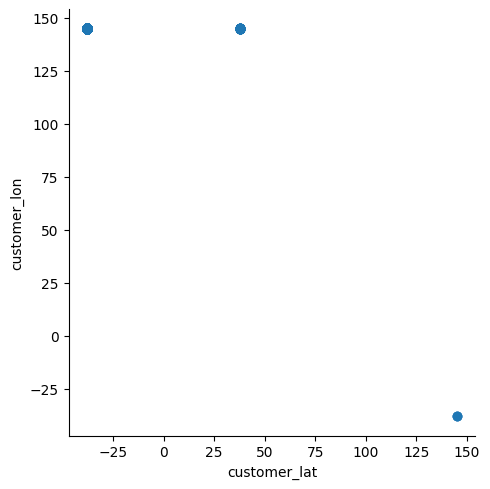

In [33]:
scatter_plot_lat_lon = sns.lmplot(x = 'customer_lat', y ='customer_lon', data = dirty_data,legend = True, fit_reg = False,  height = 5)

From the scatter plot we can see the datapoints are at opposite corners. Since all the 3 branches of the restaurant are from Melbourne CBD.
According to Google, Melbourne's Latitude: -37.8140 Longitude: 144.9633. It might be possible that the latitude and logitude are swapped and there are also negative values for lattitude which is not possible. So We have to correct errors in these columns.

In [34]:
cust_co_ordinates = pd.DataFrame(dirty_data[['customer_lat','customer_lon']])

Since there is one anomaly in a row, we check for lattitude that if it is less than longitude and it is negative. Then the latitude is correct.

In [35]:
cust_co_ordinates['lat_check'] = np.where((cust_co_ordinates['customer_lat'] < cust_co_ordinates['customer_lon']) & (cust_co_ordinates['customer_lat'] <0), True, False)

In [36]:
cust_co_ordinates['lat_correct1'] = np.where(cust_co_ordinates['customer_lat'] < cust_co_ordinates['customer_lon'],cust_co_ordinates['customer_lat'] ,cust_co_ordinates['customer_lon'])

In [37]:
cust_co_ordinates['final_lat'] = np.where(cust_co_ordinates['lat_correct1'] < 0, cust_co_ordinates['lat_correct1'], -1*cust_co_ordinates['lat_correct1'])

For longitude we check if it greater than lattitude, if not the values have been swapped.

In [38]:
cust_co_ordinates['final_lon'] = np.where(cust_co_ordinates['customer_lat'] < cust_co_ordinates['customer_lon'], cust_co_ordinates['customer_lon'], cust_co_ordinates['customer_lat'])

In [39]:
cust_co_ordinates[cust_co_ordinates['lat_check']==False]

,customer_lat,customer_lon,lat_check,lat_correct1,final_lat,final_lon
27,37.800526,144.958596,False,37.800526,-37.800526,144.958596
40,37.821246,144.961380,False,37.821246,-37.821246,144.961380
46,37.818475,145.015104,False,37.818475,-37.818475,145.015104
85,37.811941,144.969361,False,37.811941,-37.811941,144.969361
115,37.803806,144.957489,False,37.803806,-37.803806,144.957489
139,37.812504,144.937463,False,37.812504,-37.812504,144.937463
142,37.818874,144.952781,False,37.818874,-37.818874,144.952781
146,37.823242,144.988121,False,37.823242,-37.823242,144.988121
158,37.813955,144.929840,False,37.813955,-37.813955,144.929840
163,37.825125,144.991994,False,37.825125,-37.825125,144.991994


In [40]:
print('We found',len(cust_co_ordinates[cust_co_ordinates['lat_check']==False]),'errors in "customer_lat" & "customer_lon" columns.')

We found 41 errors in "customer_lat" & "customer_lon" columns.


In [41]:
# Fixing errors

dirty_data['customer_lat'] = cust_co_ordinates['final_lat']
dirty_data['customer_lon'] = cust_co_ordinates['final_lon']
dirty_data['lat_check'] = cust_co_ordinates['lat_check']
dirty_data.loc[dirty_data['lat_check'] == False,'dirty_data_fixed'] = 1
dirty_data = dirty_data.drop('lat_check',axis = 1)

In [42]:
print(len(dirty_data[dirty_data['dirty_data_fixed'] == 1]),'errors in dirty_data have been fixed till now.')

115 errors in dirty_data have been fixed till now.


In [43]:
dirty_data.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,dirty_data_fixed
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,506.58260,-37.812323,144.968503,0.126000,8.682892,13.815890,0.230000
std,285.33112,0.007518,0.021647,0.332182,1.674910,2.394122,0.421254
min,43.00000,-37.833051,144.911236,0.000000,3.613000,4.578769,0.000000
25%,288.93750,-37.818658,144.953025,0.000000,7.757000,12.482401,0.000000
50%,451.50000,-37.812284,144.966393,0.000000,8.707000,13.875824,0.000000
75%,671.55000,-37.806040,144.983571,0.000000,9.714500,15.385557,0.000000
max,1345.00000,-37.796476,145.019877,1.000000,14.095000,20.162088,1.000000


After describing the data we can see that the `customer_lat` are all negetive and `customer_lon` are positive and are in similar range. We can further see the data by using scatter plot.

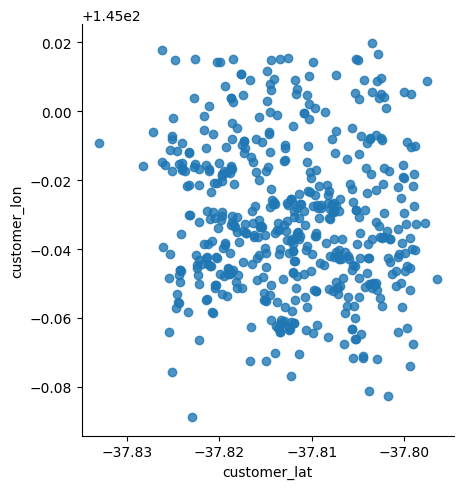

In [44]:
scatter_plot_lat_lon = sns.lmplot(x = 'customer_lat', y ='customer_lon', data = dirty_data,legend = True, fit_reg = False,  height = 5)

The scatter plot shows that the values are in similar range after fixing the errors.

<a name="sec_8"></a>
### Branch and Distance_to_customer_KM

The restaurant uses the Djikstra algorithm to calculate the shortest distance between customer and restaurant. This algorithm uses nodes and edges weight to calculate the shortest path. In our case the edge weight will be the distance.

So, First we will find the nodes corresponding to latitude and longitude form the nodes.csv file.

In [45]:
def get_node(lat,lon):
  node = nodes[(nodes['lat'] == lat) & (nodes['lon'] == lon) ]['node'].iloc[0]
  return node

We will create a graph using nodes and edges using edges.csv file. The edges dataframe will give us distance based on the  nodes.

In [46]:
# Create a graph
G = nx.Graph()

# Add nodes
for index, row in nodes.iterrows():
    G.add_node(row['node'], pos=(row['lat'], row['lon']))

# Add edges
for index, row in edges.iterrows():
    G.add_edge(row['u'], row['v'], weight=row['distance(m)'])



First we will find the node for the branch and customer. Then we use Dijkstra algorithm to calculate the shortest distance between branch and customer. Since it is not necessary that the customer should order from the nearest branch, we will calculate the shortest distance to each branch and return the dictionary of branch and shortest distance in kilometers. `calculate_distance` function does the above mentioned task.

In [47]:
def calculate_distance (cust_lat,cust_lon):

  dist_list = dict()

  for i in branches.index:

    #getting latitude and longitude of branch and branch code form branches dataframe

    branch_lat = branches['branch_lat'][i]

    branch_lon = branches['branch_lon'][i]

    branch_code = branches['branch_code'][i]

    # getting the corresponding node for the branch
    branch_node = get_node(branch_lat,branch_lon)

    #getting the customer_node
    customer_node = get_node(cust_lat,cust_lon)

    #using dijkstra algorithm to calculate the shortest distance between branch and customer
    shortest_path_distance = nx.dijkstra_path_length(G, source= branch_node, target=customer_node, weight='weight')

    #The current distance is in meters, converting it into km as the given dirty data has distance in km
    dist_list[branch_code] = shortest_path_distance/1000

  return dist_list

#reference: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html

In [48]:
corrected_dist = pd.DataFrame(dirty_data.apply(lambda x: calculate_distance(x['customer_lat'],x['customer_lon']),axis = 1)\
                              ,columns = ['correct_dist'])

In [49]:
corrected_dist.head(15)

,correct_dist
0,"{'NS': 9.642, 'TP': 11.251, 'BK': 4.0}"
1,"{'NS': 8.104, 'TP': 8.399, 'BK': 7.936}"
2,"{'NS': 8.077, 'TP': 7.976, 'BK': 7.52}"
3,"{'NS': 9.716, 'TP': 10.653, 'BK': 9.893}"
4,"{'NS': 6.513, 'TP': 9.808, 'BK': 7.847}"
5,"{'NS': 6.892, 'TP': 9.877, 'BK': 8.196}"
6,"{'NS': 6.946, 'TP': 9.104, 'BK': 6.901}"
7,"{'NS': 9.86, 'TP': 8.511, 'BK': 9.007}"
8,"{'NS': 8.218, 'TP': 9.981, 'BK': 8.695}"
9,"{'NS': 8.349, 'TP': 9.94, 'BK': 8.809}"


We will create a dataframe `branch_dist` to fix errors in branch or distance.

In [50]:
branch_dist = pd.DataFrame(dirty_data[['branch_code','distance_to_customer_KM']])



In [51]:
branch_dist =  pd.merge(branch_dist, corrected_dist, left_index = True, right_index = True)

In [52]:
branch_dist

,branch_code,distance_to_customer_KM,correct_dist
0,BK,8.399,"{'NS': 9.642, 'TP': 11.251, 'BK': 4.0}"
1,TP,8.399,"{'NS': 8.104, 'TP': 8.399, 'BK': 7.936}"
2,TP,7.976,"{'NS': 8.077, 'TP': 7.976, 'BK': 7.52}"
3,NS,9.716,"{'NS': 9.716, 'TP': 10.653, 'BK': 9.893}"
4,TP,9.808,"{'NS': 6.513, 'TP': 9.808, 'BK': 7.847}"
...,...,...,...
495,NS,9.664,"{'NS': 9.664, 'TP': 8.315, 'BK': 8.811}"
496,BK,7.976,"{'NS': 8.985, 'TP': 7.976, 'BK': 7.976}"
497,BK,6.691,"{'NS': 9.096, 'TP': 9.283, 'BK': 6.691}"
498,BK,9.235,"{'NS': 10.691, 'TP': 11.081, 'BK': 10.782}"


In [53]:
branch_dist['correct_dist_check'] = False

We will iterate through `correct_dist` column, and check if the `branch_code` and `distance_to_customer_KM` matches the correct_distance column's item.

In [54]:
for i in branch_dist.index:
  for key,val in branch_dist['correct_dist'][i].items() :
    if(key == branch_dist['branch_code'][i] and val == branch_dist['distance_to_customer_KM'][i] ):


      branch_dist['correct_dist_check'][i] = True



In [55]:
print('There are',len(branch_dist[branch_dist['correct_dist_check']==False]),'potential errors in "branch_code" & "distance_to_customer_KM" columns.')

There are 74 potential errors in "branch_code" & "distance_to_customer_KM" columns.


In [56]:
branch_dist[branch_dist['correct_dist_check']==False]

,branch_code,distance_to_customer_KM,correct_dist,correct_dist_check
0,BK,8.399,"{'NS': 9.642, 'TP': 11.251, 'BK': 4.0}",False
12,tp,6.970,"{'NS': 7.82, 'TP': 8.591, 'BK': 6.97}",False
18,TP,8.179,"{'NS': 9.436, 'TP': 9.706, 'BK': 5.855}",False
22,TP,9.143,"{'NS': 10.293, 'TP': 11.799, 'BK': 3.383}",False
36,tp,7.690,"{'NS': 7.883, 'TP': 8.235, 'BK': 7.69}",False
...,...,...,...,...
460,NS,12.427,"{'NS': 10.632, 'TP': 11.882, 'BK': 11.44}",False
466,NS,9.429,"{'NS': 9.885, 'TP': 10.913, 'BK': 4.486}",False
473,BK,7.723,"{'NS': 7.723, 'TP': 9.105, 'BK': 6.43}",False
494,ns,7.788,"{'NS': 7.788, 'TP': 8.419, 'BK': 7.656}",False


In [57]:
branch_dist['correct_branch'] = branch_dist['branch_code']


In [58]:
branch_dist['correct_distance'] = branch_dist['distance_to_customer_KM']

Now we will fix the the rows which has anamoly in branch or distance. Since there cannot be 2 anomalies. Either `branch code` is incorrect or the distance is incorrect. So We will check if the distance in `distance_to_customer_KM` column is present in the `correct_distance` column. If yes then we change the branch.

If the distance is not present we get the corresponding distance for the `branch_code` from the `correct_dist` column.

In [59]:
# Iterate through the DataFrame
for i in branch_dist.index:
    # Extract the current distance and branch code
    current_distance = branch_dist.at[i, 'distance_to_customer_KM']
    current_branch_code = branch_dist.at[i, 'branch_code']
    correct_dist_dict = branch_dist.at[i, 'correct_dist']

    # Initialize flags to indicate if updates are made
    branch_updated = False
    distance_updated = False

    # Check if the current distance is present in the correct_dist dictionary
    for branch, distance in correct_dist_dict.items():
        if current_distance == distance:
            # Update the correct_branch column with the corresponding branch
            branch_dist.at[i, 'correct_branch'] = branch
            branch_updated = True
            break

    if not branch_updated:
        # Check if the branch code exists in the correct_dist dictionary
        if current_branch_code in correct_dist_dict:
            correct_distance = correct_dist_dict[current_branch_code]
            # Update the correct_distance column with the fetched correct distance
            branch_dist.at[i, 'correct_distance'] = correct_distance
            distance_updated = True


In [60]:
branch_dist.head(5)

,branch_code,distance_to_customer_KM,correct_dist,correct_dist_check,correct_branch,correct_distance
0,BK,8.399,"{'NS': 9.642, 'TP': 11.251, 'BK': 4.0}",False,BK,4.000
1,TP,8.399,"{'NS': 8.104, 'TP': 8.399, 'BK': 7.936}",True,TP,8.399
2,TP,7.976,"{'NS': 8.077, 'TP': 7.976, 'BK': 7.52}",True,TP,7.976
3,NS,9.716,"{'NS': 9.716, 'TP': 10.653, 'BK': 9.893}",True,NS,9.716
4,TP,9.808,"{'NS': 6.513, 'TP': 9.808, 'BK': 7.847}",True,TP,9.808


In [61]:
dirty_data['distance_to_customer_KM'] = branch_dist['correct_distance']
dirty_data['branch_code'] = branch_dist['correct_branch']
dirty_data['distance_check'] = branch_dist['correct_dist_check']
dirty_data.loc[dirty_data['distance_check'] == False,'dirty_data_fixed'] = 1
dirty_data = dirty_data.drop(['distance_check'],axis = 1)

In [62]:
print('We have fixed',len(dirty_data[dirty_data['dirty_data_fixed'] == 1]),'errors in dirty_data till now.')

We have fixed 189 errors in dirty_data till now.


<a name="sec_9"></a>
### Order_items and order_price

First, We will get the price of individual items using the clean data

In [63]:
# Use observations for which error has been corrected earlier.

cleaned_data = dirty_data[dirty_data['dirty_data_fixed'] == 1]

order_items = pd.DataFrame(cleaned_data[['order_type','order_items','order_price']])

# Form a matrix with each item in order_item as columns and set 0 if item is not present in the order for that row.

order_items_matrix = pd.concat([pd.DataFrame(eval(x)).set_index(0) for x in order_items['order_items']], axis = 1).fillna(0).T

#reference: https://stackoverflow.com/questions/58152952/finding-unknown-values-in-python

# 'order_price' for each row  in list
order_price = list(order_items['order_price'])

# using np.linalg to solve equation

X1, _, _, _ = np.linalg.lstsq(order_items_matrix, order_price, rcond=None)

item_price = np.round(X1,5)

price_dict = dict(zip(order_items_matrix.columns, item_price))

price_dict

{'Burger': 31.0,
 'Chicken': 32.0,
 'Steak': 45.0,
 'Fries': 12.0,
 'Salad': 17.2,
 'Pancake': 24.25,
 'Cereal': 21.0,
 'Pasta': 27.5,
 'Salmon': 41.0,
 'Shrimp': 54.0,
 'Fish&Chips': 35.0,
 'Eggs': 22.0,
 'Coffee': 7.5}

Now we will create a dictionary for order type and items .

In [64]:
# Creating a dictionary with order_type as key and set with order_items without quantities as value

order_dict_no_quantity = {}

for _, row in order_items.iterrows():
    if row['order_type'] not in order_dict_no_quantity:
        order_dict_no_quantity[row['order_type']] = set()
    items = {item[0] for item in eval(row['order_items'])}
    order_dict_no_quantity[row['order_type']].update(items)

order_dict_no_quantity

order_dict_list = {key: list(value) for key, value in order_dict_no_quantity.items()}

order_dict_list

{'Lunch': ['Salad', 'Burger', 'Fries', 'Chicken', 'Steak'],
 'Breakfast': ['Pancake', 'Cereal', 'Coffee', 'Eggs'],
 'Dinner': ['Fish&Chips', 'Shrimp', 'Pasta', 'Salmon']}

Now we will calculate the order price of the order_cart by multipling the quantity with the calculated price for that item.

In [65]:
# Function to calculate order_price from order_items.

def verify_order_price(order_items):

   order_items = eval(order_items)

   total = 0

   for i,j in order_items:

        total += price_dict[i]*j

   return total

We will verify the order_type of all the items in the order, that they belong to the correct order_type. If not, there is an error in the item for that cart.

In [66]:
def verify_order_type(order_items, order_dict):
    items_set = {item[0] for item in order_items}
    for order_type, items in order_dict.items():
        if items_set.issubset(set(items)):
            return True
    return False

Now we will call all the functions. First, we will create a new column to store the order_price calculated using verify_order_price function. Then we check the order type of the cart, whether all of them belong to the same order_type mentioned, using verify_order_type function. Then we will create a column `order_price_check` which will compare the order_price and the correct_order_price and store boolean based on whether it matches or not.

In [67]:

orders = dirty_data[['order_type','order_items','order_price']]

orders['correct_order_price'] = orders['order_items'].apply(lambda x : verify_order_price(x))

orders['is_order_type_correct'] = orders['order_items'].apply(lambda x : verify_order_type(eval(x),order_dict_list))

orders['is_order_price_correct'] = np.where(((orders['order_price'] == orders['correct_order_price']) |(orders['is_order_type_correct'] != True)), True, False)

orders

,order_type,order_items,order_price,correct_order_price,is_order_type_correct,is_order_price_correct
0,Lunch,"[('Burger', 2), ('Chicken', 9), ('Steak', 9), ...",1012.6,1012.6,True,True
1,Breakfast,"[('Pancake', 8), ('Eggs', 4)]",282.0,282.0,True,True
2,Lunch,"[('Chicken', 7), ('Fries', 6), ('Steak', 2), (...",682.2,672.5,False,True
3,Lunch,"[('Salad', 1), ('Steak', 10), ('Fries', 1)]",479.2,479.2,True,True
4,Dinner,"[('Fish&Chips', 1), ('Pasta', 6)]",200.0,200.0,True,True
...,...,...,...,...,...,...
495,Lunch,"[('Chicken', 6), ('Steak', 7), ('Fries', 4)]",555.0,555.0,True,True
496,Dinner,"[('Shrimp', 3), ('Fish&Chips', 10), ('Pasta', 1)]",539.5,539.5,True,True
497,Breakfast,"[('Coffee', 1), ('Cereal', 6)]",133.5,133.5,True,True
498,Lunch,"[('Fries', 10), ('Chicken', 3), ('Salad', 8), ...",508.6,508.6,True,True


In [68]:

print('We found',len(orders[orders['is_order_price_correct']== False]),'potential errors in "order_price" column" & ',len(orders[orders['is_order_type_correct']== False]),'potential errors in "order_type" column"')

We found 39 potential errors in "order_price" column" &  37 potential errors in "order_type" column"


We will create a list of correct items and wrong items. For every correct item, we add the items price with quantity in the total.
For fixing the wrong item, we subtract the correct_total price with the total of the correct cart so that we get the total price for the wrong item.
Then we divide with the quantity of the wrong item to get the product price.
Then we check which item in the has that price from the above dictionary.

 After fixing the item, we keep it in fixed item list, so that we can store it in the correct position in the correct list.

In [69]:
def fix_order(order_type ,order, price):

  wrong_items_list = []
  correct_items_list = []
  fixed_item = []
  correct_items_list_total = 0


  order = eval(order)

  for i,j in order:

    if i in order_dict_list[order_type]:

      correct_items_list.append((i,j))

      correct_items_list_total += price_dict[i]*j

    if i not in order_dict_list[order_type]:

      wrong_items_list.append((i,j))

      ind = order.index((i,j))

  if (len(wrong_items_list)>0):

    remaining_total = round((price - correct_items_list_total),1)

    quantity = wrong_items_list[0][1]

    unit_price = remaining_total/quantity

    for key,val in price_dict.items():

      if(unit_price == val):

        fixed_item = (key,quantity)


    correct_items_list.insert(ind,fixed_item)

  return str(correct_items_list)





In [70]:
final_order_items = pd.DataFrame(orders.apply(lambda x: fix_order(x['order_type'],x['order_items'],x['order_price']),axis = 1)\
                              ,columns = ['final_order_items'])

In [71]:
orders = pd.merge(orders, final_order_items, left_index = True, right_index = True)

In [72]:
orders['final_order_price'] = np.where(((orders['order_items'] == orders['final_order_items']) & (orders['is_order_price_correct'] == False)) , orders['is_order_price_correct'], orders['order_price'])

In [73]:
orders.head(3)

,order_type,order_items,order_price,correct_order_price,is_order_type_correct,is_order_price_correct,final_order_items,final_order_price
0,Lunch,"[('Burger', 2), ('Chicken', 9), ('Steak', 9), ...",1012.6,1012.6,True,True,"[('Burger', 2), ('Chicken', 9), ('Steak', 9), ...",1012.6
1,Breakfast,"[('Pancake', 8), ('Eggs', 4)]",282.0,282.0,True,True,"[('Pancake', 8), ('Eggs', 4)]",282.0
2,Lunch,"[('Chicken', 7), ('Fries', 6), ('Steak', 2), (...",682.2,672.5,False,True,"[('Chicken', 7), ('Fries', 6), ('Steak', 2), (...",682.2


In [74]:


dirty_data['order_items'] = orders['final_order_items']
dirty_data['is_order_type_correct'] = orders['is_order_type_correct']
dirty_data.loc[dirty_data['is_order_type_correct'] == False ,'dirty_data_fixed'] = 1

dirty_data['order_price'] = orders['final_order_price']
dirty_data['is_order_price_correct'] = orders['is_order_price_correct']
dirty_data.loc[dirty_data['is_order_price_correct'] == False ,'dirty_data_fixed'] = 1
dirty_data = dirty_data.drop(['is_order_type_correct','is_order_price_correct'],axis = 1)



In [75]:
print('We have',len(dirty_data[dirty_data['dirty_data_fixed'] == 1]),'errors in dirty_data have been fixed till now.')

We have 265 errors in dirty_data have been fixed till now.


In [76]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,dirty_data_fixed
0,ORDK08894,2018-08-18,15:36:20,Lunch,BK,"[('Burger', 2), ('Chicken', 9), ('Steak', 9), ...",1012.6,-37.810325,145.001993,0,4.000,12.191410,1
1,ORDB03085,2018-03-21,10:32:06,Breakfast,TP,"[('Pancake', 8), ('Eggs', 4)]",282.0,-37.813451,144.960142,0,8.399,10.765903,0
2,ORDJ00518,2018-06-15,13:24:30,Lunch,TP,"[('Chicken', 7), ('Fries', 6), ('Steak', 2), (...",682.2,-37.815448,144.966570,0,7.976,11.277593,1
3,ORDC10767,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Steak', 10), ('Fries', 1)]",479.2,-37.805673,144.936892,0,9.716,17.812171,0
4,ORDJ02254,2018-12-27,20:00:00,Dinner,TP,"[('Fish&Chips', 1), ('Pasta', 6)]",200.0,-37.800649,144.965890,1,9.808,13.456400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDI07419,2018-07-20,14:35:29,Lunch,NS,"[('Chicken', 6), ('Steak', 7), ('Fries', 4)]",555.0,-37.822463,144.954454,0,9.664,15.181881,0
496,ORDA01168,2018-10-20,17:38:01,Dinner,TP,"[('Shrimp', 3), ('Fish&Chips', 10), ('Pasta', 1)]",539.5,-37.823291,144.969953,0,7.976,17.894389,0
497,ORDX00043,2018-04-01,10:52:23,Breakfast,BK,"[('Coffee', 1), ('Cereal', 6)]",133.5,-37.822612,144.984805,0,6.691,13.687760,1
498,ORDK04120,2018-08-30,15:56:37,Lunch,BK,"[('Fries', 10), ('Chicken', 3), ('Salad', 8), ...",508.6,-37.810492,144.943228,0,10.782,17.017682,1


Now we are left with the `customerHasloyalty?` column. But the only information we have about this column is that if the customer has loyalty, they get a 50 percent discount on the delivery fee. For this we need a model to predict the delivery fee. First we will deal with the missing data file and then get a model for delivery fee to predict and based on it we will find the customer loyalty.

<a name="sec_10"></a>
# Task 1: Imputing Missing Values

<a name="sec_11"></a>
## Load dataset

In [78]:
missing_data = pd.read_csv('/content/Group011_missing_data.csv')

In [79]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              400 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  450 non-null    float64
 11  delivery_fee             450 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


500 records in total now starting fill missing value.

We check there is no branch code or distance missing where delivery is null.

In [80]:
missing_data[missing_data['delivery_fee'].isnull()].head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
5,ORDC07390,2018-12-02,19:09:17,Dinner,NS,"[('Pasta', 2), ('Fish&Chips', 5)]",230.0,-37.802405,144.978945,0,6.961,NaN
11,ORDJ03973,2018-12-04,19:09:17,Dinner,TP,"[('Salmon', 5), ('Shrimp', 7)]",583.0,-37.811672,145.015387,0,12.738,NaN
22,ORDJ10505,2018-06-20,13:34:38,Lunch,TP,"[('Burger', 9), ('Fries', 6)]",351.0,-37.824411,144.958108,0,8.266,NaN
23,ORDC00032,2018-08-30,15:56:37,Lunch,NS,"[('Fries', 6), ('Salad', 6), ('Burger', 10)]",485.2,-37.807907,144.973469,0,7.102,NaN
27,ORDI07785,2018-11-14,18:28:43,Dinner,NS,"[('Salmon', 5), ('Pasta', 3), ('Shrimp', 2)]",395.5,-37.800308,144.962979,0,6.778,NaN


In [81]:

# Remove rows where both 'branch_code' and 'distance_to_customer_KM' are missing
missing_data.dropna(subset=['branch_code', 'distance_to_customer_KM'], how='all', inplace=True)


In [82]:

# Reset the index of the DataFrame
missing_data.reset_index(drop=True, inplace=True)


In [83]:
missing_data['correct_dist'] = missing_data.apply(lambda x: calculate_distance(x['customer_lat'], x['customer_lon']), axis=1)


In [84]:
missing_data['missing_data_fixed'] = 0

<a name="sec_12"></a>
## Fill branch code and distance

In [85]:

# Update 'missing_data' by filling missing 'branch_code' or 'distance_to_customer_KM'
for i in missing_data.index:
    current_distance = missing_data.at[i, 'distance_to_customer_KM']
    current_branch_code = missing_data.at[i, 'branch_code']
    correct_dist_dict = missing_data.at[i, 'correct_dist']

    # Update missing 'branch_code' if 'distance_to_customer_KM' is present
    if pd.isna(current_branch_code) and not pd.isna(current_distance):
        for branch, distance in correct_dist_dict.items():
            if current_distance == distance:  # Allow small variance for matching
                missing_data.at[i, 'branch_code'] = branch
                missing_data.at[i,'missing_data_fixed'] = 1
                break


In [86]:
missing_data[['order_id','branch_code','distance_to_customer_KM','correct_dist','missing_data_fixed', 'delivery_fee' ]]

,order_id,branch_code,distance_to_customer_KM,correct_dist,missing_data_fixed,delivery_fee
0,ORDI02669,NS,9.167,"{'NS': 9.167, 'TP': 8.405, 'BK': 8.689}",1,16.290109
1,ORDY00148,TP,10.289,"{'NS': 9.375, 'TP': 10.289, 'BK': 9.551}",0,14.064789
2,ORDK04385,BK,10.398,"{'NS': 10.307, 'TP': 10.832, 'BK': 10.398}",0,18.651254
3,ORDB00712,TP,8.387,"{'NS': 10.036, 'TP': 8.387, 'BK': 9.183}",0,12.538747
4,ORDC08170,NS,8.461,"{'NS': 8.461, 'TP': 8.592, 'BK': 7.147}",0,14.535288
...,...,...,...,...,...,...
445,ORDZ03627,NS,9.932,"{'NS': 9.932, 'TP': 9.874, 'BK': 9.955}",0,18.491309
446,ORDX08188,BK,8.847,"{'NS': 9.287, 'TP': 8.562, 'BK': 8.847}",0,13.530350
447,ORDY08319,TP,9.625,"{'NS': 7.447, 'TP': 9.625, 'BK': 8.304}",0,13.146885
448,ORDY07174,TP,8.649,"{'NS': 8.109, 'TP': 8.649, 'BK': 8.085}",0,12.866754


In [87]:
missing_data.info()
#Now we will remove correct_dist and missing_data_fixed column
missing_data = missing_data.drop('correct_dist', axis = 1 )
missing_data = missing_data.drop('missing_data_fixed', axis = 1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 450 non-null    object 
 1   date                     450 non-null    object 
 2   time                     450 non-null    object 
 3   order_type               450 non-null    object 
 4   branch_code              450 non-null    object 
 5   order_items              450 non-null    object 
 6   order_price              450 non-null    float64
 7   customer_lat             450 non-null    float64
 8   customer_lon             450 non-null    float64
 9   customerHasloyalty?      450 non-null    int64  
 10  distance_to_customer_KM  450 non-null    float64
 11  delivery_fee             400 non-null    float64
 12  correct_dist             450 non-null    object 
 13  missing_data_fixed       450 non-null    int64  
dtypes: float64(5), int64(2), o

Till now we have 450 records which does not have any null values except 50 values in delivery fee

-imputed the branch code

We will use corrected data from the dirtydata


In [88]:
cleaned_dirty_data = dirty_data[dirty_data['dirty_data_fixed']==1]

In [89]:
#here we can see that we have got all the 265 corrected rows from the dirty data.

cleaned_dirty_data = cleaned_dirty_data.drop('dirty_data_fixed', axis = 1)
cleaned_dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 498
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 265 non-null    object 
 1   date                     265 non-null    object 
 2   time                     265 non-null    object 
 3   order_type               265 non-null    object 
 4   branch_code              265 non-null    object 
 5   order_items              265 non-null    object 
 6   order_price              265 non-null    float64
 7   customer_lat             265 non-null    float64
 8   customer_lon             265 non-null    float64
 9   customerHasloyalty?      265 non-null    int64  
 10  distance_to_customer_KM  265 non-null    float64
 11  delivery_fee             265 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 26.9+ KB


Merging both the missing data (non-missing data) and cleaned_dirty_data to train the model.

In [90]:
df = pd.concat([cleaned_dirty_data, missing_data], axis=0)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 449
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 715 non-null    object 
 1   date                     715 non-null    object 
 2   time                     715 non-null    object 
 3   order_type               715 non-null    object 
 4   branch_code              715 non-null    object 
 5   order_items              715 non-null    object 
 6   order_price              715 non-null    float64
 7   customer_lat             715 non-null    float64
 8   customer_lon             715 non-null    float64
 9   customerHasloyalty?      715 non-null    int64  
 10  distance_to_customer_KM  715 non-null    float64
 11  delivery_fee             665 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 72.6+ KB


<a name="sec_13"></a>
## Impute delivery fee
As stated in the specifications:
Delivery fee is calculated using a different method for each branch.
The fee depends linearly on:

a. weekend or weekday (1 or 0)

b. time of the day (0, 1, 2)

c. distance between branch and customer

We would like to build a linear regression model to predict the effect of different branch_code and time_of_day on original_delivery_fee, we will build the linear regression model based on different branch_code and time_of_day respectively. First, we need to perform feature engineering to extract the required features: weekend(bool), time_of_day and original_delivery_fee. Second, we build linear regression model and evaluate its performance. Third,  we fill missing data.

<a name="sec_14"></a>
### Restore 'delivery_fee'
First restore 'delivery_fee' to become 'original_delivery_fee' based on 'customerHasloyalty?'.

In [92]:
# restore delivery fee (if has loyalty delivery fee get 50% off discount)
# create 'original_delivery_fee' column
df['original_delivery_fee'] = df.apply(
    lambda row: row['delivery_fee'] * 2 if row['customerHasloyalty?'] == 1 and pd.notna(row['delivery_fee']) else row['delivery_fee'], axis=1
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 449
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 715 non-null    object 
 1   date                     715 non-null    object 
 2   time                     715 non-null    object 
 3   order_type               715 non-null    object 
 4   branch_code              715 non-null    object 
 5   order_items              715 non-null    object 
 6   order_price              715 non-null    float64
 7   customer_lat             715 non-null    float64
 8   customer_lon             715 non-null    float64
 9   customerHasloyalty?      715 non-null    int64  
 10  distance_to_customer_KM  715 non-null    float64
 11  delivery_fee             665 non-null    float64
 12  original_delivery_fee    665 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 78.2+ KB


<a name="sec_15"></a>
### Feature Engineering
Second, feature engineering, get weekend and time_of_day

In [93]:
# Creating the 'weekend' feature
df['date_changed'] = pd.to_datetime(df['date'])
df['weekend'] = df['date_changed'].dt.dayofweek >= 5

# Creating the 'time_of_day' feature
def time_of_day(order_type):
    if order_type == 'Breakfast':
        return 0  # Morning
    elif order_type == 'Lunch':
        return 1  # Afternoon
    else:
        return 2  # Evening

df['time_of_day'] = df['order_type'].apply(lambda x: time_of_day(x))




# convert to integer
df['weekend'] = df['weekend'].astype(int)
df['time_of_day'] = df['time_of_day'].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 449
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 715 non-null    object        
 1   date                     715 non-null    object        
 2   time                     715 non-null    object        
 3   order_type               715 non-null    object        
 4   branch_code              715 non-null    object        
 5   order_items              715 non-null    object        
 6   order_price              715 non-null    float64       
 7   customer_lat             715 non-null    float64       
 8   customer_lon             715 non-null    float64       
 9   customerHasloyalty?      715 non-null    int64         
 10  distance_to_customer_KM  715 non-null    float64       
 11  delivery_fee             665 non-null    float64       
 12  original_delivery_fee    665 non-null    

<a name="sec_16"></a>
### Build and evaluate model
Using feature extracted to build linear modelbased on different branch_code and time_of_day respectively.

In [95]:
# Take a subset of valid data to build model using not null rows.
valid_data = df.dropna(subset=['original_delivery_fee'])

# Create dictionaries to store training and test sets for different branches and time of day.
train_data_dict = {}
test_data_dict = {}

for branch in valid_data['branch_code'].unique():
    for time_period in valid_data['time_of_day'].unique():
        branch_time_data = valid_data[(valid_data['branch_code'] == branch) & (valid_data['time_of_day'] == time_period)]
        if len(branch_time_data) > 1:
            X = branch_time_data[['weekend', 'distance_to_customer_KM']]
            y = branch_time_data['original_delivery_fee']
            # split train and test data based on corresponding branch and time of day.
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
            train_data_dict[(branch, time_period)] = (X_train, y_train)
            test_data_dict[(branch, time_period)] = (X_test, y_test)

# Build linear regression models for each branch and each time period and evaluate model performance
models = {}
r2_scores = {}
predictions = {}
actuals = {}

for branch in valid_data['branch_code'].unique():
    branch_predictions = []
    branch_actuals = []
    for time_period in valid_data['time_of_day'].unique():
        if (branch, time_period) in train_data_dict:
            X_train, y_train = train_data_dict[(branch, time_period)]
            X_test, y_test = test_data_dict[(branch, time_period)]

            model = LinearRegression()
            model.fit(X_train, y_train)
            models[(branch, time_period)] = model

            # predicted values
            y_pred = model.predict(X_test)
            branch_predictions.extend(y_pred)
            branch_actuals.extend(y_test)

            r2 = r2_score(y_test, y_pred)
            r2_scores[branch] = r2
            predictions[branch] = branch_predictions
            actuals[branch] = branch_actuals
            print(f"Branch and time of day {time_period} : {branch}, R² Score: {r2}")
            if r2 < 0.95:
                print(f"Warning: The model for branch {branch} and time of day {time_period} has an R² score less than 0.95")
    # Calculate the overall R² score for each branch_code
    r2 = r2_score(branch_actuals, branch_predictions)
    r2_scores[branch] = r2
    predictions[branch] = branch_predictions
    actuals[branch] = branch_actuals

    print(f"Branch: {branch}, R² Score: {r2}")
    if r2 < 0.95:
        print(f"Warning: The model for branch {branch} has an R² score less than 0.95")



Branch and time of day 1 : BK, R² Score: 0.9492716551301699
Branch and time of day 0 : BK, R² Score: 0.9795958913838331
Branch and time of day 2 : BK, R² Score: 0.9836065259029115
Branch: BK, R² Score: 0.9849598204882529
Branch and time of day 1 : TP, R² Score: 0.9430851314788513
Branch and time of day 0 : TP, R² Score: 0.8993080270783674
Branch and time of day 2 : TP, R² Score: 0.9721568171135997
Branch: TP, R² Score: 0.954403269216536
Branch and time of day 1 : NS, R² Score: 0.9249338811776958
Branch and time of day 0 : NS, R² Score: 0.9736466005932959
Branch and time of day 2 : NS, R² Score: 0.9880712571344379
Branch: NS, R² Score: 0.9732765116371473


<a name="sec_17"></a>
### Fill missing delivery_fee
A valid predictive model was obtained,now using the predicted values to fill in the missing values from a new fresh file as in the earlier file we have dropped few rows.

In [97]:
missing_data_from_file = pd.read_csv('/content/Group011_missing_data.csv')

In [98]:
# Creating the 'weekend' feature
missing_data_from_file['date_changed'] = pd.to_datetime(missing_data_from_file['date'])
missing_data_from_file['weekend'] = missing_data_from_file['date_changed'].dt.dayofweek >= 5

# Creating the 'time_of_day' feature
def time_of_day(order_type):
    if order_type == 'Breakfast':
        return 0  # Morning
    elif order_type == 'Lunch':
        return 1  # Afternoon
    else:
        return 2  # Evening

missing_data_from_file['time_of_day'] = missing_data_from_file['order_type'].apply(lambda x: time_of_day(x))




# convert to integer
missing_data_from_file['weekend'] = missing_data_from_file['weekend'].astype(int)
missing_data_from_file['time_of_day'] = missing_data_from_file['time_of_day'].astype(int)

In [99]:
# data before filling
missing_data_from_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 500 non-null    object        
 1   date                     500 non-null    object        
 2   time                     500 non-null    object        
 3   order_type               500 non-null    object        
 4   branch_code              400 non-null    object        
 5   order_items              500 non-null    object        
 6   order_price              500 non-null    float64       
 7   customer_lat             500 non-null    float64       
 8   customer_lon             500 non-null    float64       
 9   customerHasloyalty?      500 non-null    int64         
 10  distance_to_customer_KM  450 non-null    float64       
 11  delivery_fee             450 non-null    float64       
 12  date_changed             500 non-nul

In [100]:
# function to fill delivery_fee using predicted original_delivery_fee
# then if customerHasloyalty == 1 pred_fee *1/2, else pred_fee.
def predict_delivery_fee(row):
    if pd.isna(row['delivery_fee']):
        branch = row['branch_code']
        time_period = row['time_of_day']
        if (branch, time_period) in models:
            model = models[(branch, time_period)]
            X = pd.DataFrame([[row['weekend'], row['distance_to_customer_KM']]], columns=['weekend', 'distance_to_customer_KM'])
            predicted_fee = model.predict(X)[0]
            # If customerHasloyalty? is 1, halve the prediction.
            if row['customerHasloyalty?'] == 1:
                return predicted_fee * 1/2
            else:
                return predicted_fee
            # return model.predict(X)[0]
    return row['delivery_fee']

missing_data_from_file['delivery_fee'] = missing_data_from_file.apply(predict_delivery_fee, axis=1)
# check data
missing_data_from_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 500 non-null    object        
 1   date                     500 non-null    object        
 2   time                     500 non-null    object        
 3   order_type               500 non-null    object        
 4   branch_code              400 non-null    object        
 5   order_items              500 non-null    object        
 6   order_price              500 non-null    float64       
 7   customer_lat             500 non-null    float64       
 8   customer_lon             500 non-null    float64       
 9   customerHasloyalty?      500 non-null    int64         
 10  distance_to_customer_KM  450 non-null    float64       
 11  delivery_fee             500 non-null    float64       
 12  date_changed             500 non-nul

delivery_fee has been filled.

<a name="sec_18"></a>
## Verify and Output
Ensure that the output and input files are consistent

In [101]:
# drop different columns
missing_data_from_file.drop(['date_changed','weekend','time_of_day'], axis = 1, inplace = True)
# check data
missing_data_from_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              400 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  450 non-null    float64
 11  delivery_fee             500 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


Output csv

In [102]:
#creating missing value file
missing_data_from_file.to_csv('group011_missing_data_solution.csv', index=False)

<a name="sec0"></a>
#Task 1 Dirty data: Customer Loyalty
Now that we have fixed the missing values in the `delivery_fee` and a model trained to get the `delivery_fee`.  We will use the data where the errors have not been corrected and predict the `delivery_fee`. If the `predicted delivery_fee` is half the `delivery_fee` means that the customer has the membership.

In [103]:
not_clean_data = dirty_data[dirty_data['dirty_data_fixed'] == 0]

creating a new column `predicted_delivery_fee` to store the values from prediction using the model.

In [104]:
not_clean_data['predicted_delivery_fee'] = 0
not_clean_data.reset_index(drop=True, inplace=True)

# Creating the 'weekend' feature
not_clean_data['date_changed'] = pd.to_datetime(not_clean_data['date'])
not_clean_data['weekend'] = not_clean_data['date_changed'].dt.dayofweek >= 5

# Creating the 'time_of_day' feature
def time_of_day(order_type):
    if order_type == 'Breakfast':
        return 0  # Morning
    elif order_type == 'Lunch':
        return 1  # Afternoon
    else:
        return 2  # Evening

not_clean_data['time_of_day'] = not_clean_data['order_type'].apply(lambda x: time_of_day(x))




# convert to integer
not_clean_data['weekend'] = not_clean_data['weekend'].astype(int)
not_clean_data['time_of_day'] = not_clean_data['time_of_day'].astype(int)
def predict_delivery_fee(row):
    if row[ 'predicted_delivery_fee'] == 0:
        branch = row['branch_code']
        time_period = row['time_of_day']
        if (branch, time_period) in models:
            model = models[(branch, time_period)]
            X = pd.DataFrame([[row['weekend'], row['distance_to_customer_KM']]], columns=['weekend', 'distance_to_customer_KM'])
            predicted_fee = model.predict(X)[0]
            # If customerHasloyalty? is 1, halve the prediction.
            if row['customerHasloyalty?'] == 1:
                return predicted_fee * 1/2
            else:
                return predicted_fee
            # return model.predict(X)[0]
    return row['predicted_delivery_fee']

not_clean_data['predicted_delivery_fee'] = not_clean_data.apply(predict_delivery_fee, axis=1)
# check data
not_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 235 non-null    object        
 1   date                     235 non-null    object        
 2   time                     235 non-null    object        
 3   order_type               235 non-null    object        
 4   branch_code              235 non-null    object        
 5   order_items              235 non-null    object        
 6   order_price              235 non-null    float64       
 7   customer_lat             235 non-null    float64       
 8   customer_lon             235 non-null    float64       
 9   customerHasloyalty?      235 non-null    int64         
 10  distance_to_customer_KM  235 non-null    float64       
 11  delivery_fee             235 non-null    float64       
 12  dirty_data_fixed         235 non-nul

Now we check the differnece between predicted fee and original fee and put true or false in is_near column with the tolerence of 1.

In [105]:
tolerance = 1.00

# Calculate the absolute difference and check nearness
not_clean_data['difference'] = abs(not_clean_data['delivery_fee'] - not_clean_data['predicted_delivery_fee'])
not_clean_data['is_near'] = not_clean_data['difference'] <= tolerance

# View the results
not_clean_data[['order_id','customerHasloyalty?','delivery_fee', 'predicted_delivery_fee', 'difference', 'is_near']]


,order_id,customerHasloyalty?,delivery_fee,predicted_delivery_fee,difference,is_near
0,ORDB03085,0,10.765903,11.202189,0.436286,True
1,ORDC10767,0,17.812171,17.201618,0.610553,True
2,ORDJ02254,1,13.456400,6.936679,6.519721,False
3,ORDX10241,0,15.100167,15.005436,0.094730,True
4,ORDI09871,0,15.640768,15.835301,0.194533,True
...,...,...,...,...,...,...
230,ORDZ07534,1,13.237590,6.786641,6.450949,False
231,ORDY00554,0,11.526221,11.995299,0.469078,True
232,ORDI07419,0,15.181881,15.162683,0.019198,True
233,ORDA01168,0,17.894389,13.839521,4.054867,False


In [106]:
# Filter rows where 'is_near' is False

not_clean_data['customerHasloyalty?'] = not_clean_data.apply(
    lambda row: 0 if (row['is_near'] == False and row['customerHasloyalty?'] == 1 ) else (
        1 if (row['is_near'] == False and row['customerHasloyalty?'] == 0 ) else row['customerHasloyalty?']
    ), axis=1
)


In [107]:

not_clean_data[['order_id','customerHasloyalty?','delivery_fee', 'predicted_delivery_fee', 'difference', 'is_near']]


,order_id,customerHasloyalty?,delivery_fee,predicted_delivery_fee,difference,is_near
0,ORDB03085,0,10.765903,11.202189,0.436286,True
1,ORDC10767,0,17.812171,17.201618,0.610553,True
2,ORDJ02254,0,13.456400,6.936679,6.519721,False
3,ORDX10241,0,15.100167,15.005436,0.094730,True
4,ORDI09871,0,15.640768,15.835301,0.194533,True
...,...,...,...,...,...,...
230,ORDZ07534,0,13.237590,6.786641,6.450949,False
231,ORDY00554,0,11.526221,11.995299,0.469078,True
232,ORDI07419,0,15.181881,15.162683,0.019198,True
233,ORDA01168,1,17.894389,13.839521,4.054867,False


In [108]:


print('We found', len(not_clean_data[not_clean_data['is_near'] == False]), 'potential errors in the "customerHasloyalty?" column')

We found 38 potential errors in the "customerHasloyalty?" column


In [109]:
filtered_check_diff = not_clean_data[(not_clean_data['is_near'] == False)]

merged_data = pd.merge(dirty_data, filtered_check_diff[['order_id', 'customerHasloyalty?','is_near' ]], on='order_id', how='left', suffixes=('', '_new'))

dirty_data.loc[(dirty_data['dirty_data_fixed'] == 0) & (merged_data['customerHasloyalty?_new'].notna()), 'customerHasloyalty?'] = merged_data['customerHasloyalty?_new']

dirty_data.loc[(dirty_data['dirty_data_fixed'] == 0) & (merged_data['is_near'].notna()), 'is_near'] = merged_data['is_near']



In [110]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,dirty_data_fixed,is_near
0,ORDK08894,2018-08-18,15:36:20,Lunch,BK,"[('Burger', 2), ('Chicken', 9), ('Steak', 9), ...",1012.6,-37.810325,145.001993,0,4.000,12.191410,1,NaN
1,ORDB03085,2018-03-21,10:32:06,Breakfast,TP,"[('Pancake', 8), ('Eggs', 4)]",282.0,-37.813451,144.960142,0,8.399,10.765903,0,NaN
2,ORDJ00518,2018-06-15,13:24:30,Lunch,TP,"[('Chicken', 7), ('Fries', 6), ('Steak', 2), (...",682.2,-37.815448,144.966570,0,7.976,11.277593,1,NaN
3,ORDC10767,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Steak', 10), ('Fries', 1)]",479.2,-37.805673,144.936892,0,9.716,17.812171,0,NaN
4,ORDJ02254,2018-12-27,20:00:00,Dinner,TP,"[('Fish&Chips', 1), ('Pasta', 6)]",200.0,-37.800649,144.965890,0,9.808,13.456400,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDI07419,2018-07-20,14:35:29,Lunch,NS,"[('Chicken', 6), ('Steak', 7), ('Fries', 4)]",555.0,-37.822463,144.954454,0,9.664,15.181881,0,NaN
496,ORDA01168,2018-10-20,17:38:01,Dinner,TP,"[('Shrimp', 3), ('Fish&Chips', 10), ('Pasta', 1)]",539.5,-37.823291,144.969953,1,7.976,17.894389,0,False
497,ORDX00043,2018-04-01,10:52:23,Breakfast,BK,"[('Coffee', 1), ('Cereal', 6)]",133.5,-37.822612,144.984805,0,6.691,13.687760,1,NaN
498,ORDK04120,2018-08-30,15:56:37,Lunch,BK,"[('Fries', 10), ('Chicken', 3), ('Salad', 8), ...",508.6,-37.810492,144.943228,0,10.782,17.017682,1,NaN


In [111]:

dirty_data.loc[dirty_data['is_near'] == False,'dirty_data_fixed'] = 1

In [112]:
print(len(dirty_data[dirty_data['dirty_data_fixed'] == 1]),'errors in dirty_data have been fixed till now.')

303 errors in dirty_data have been fixed till now.


<a name="sec_"></a>
###Output File: Dirty Data

We will drop the dirty_data_fixed column and export the file.

In [113]:
dirty_data = dirty_data.drop(['dirty_data_fixed', 'is_near'], axis =1)

dirty_data.to_csv('group011_dirty_data_solution.csv', index=False)

<a name="sec_19"></a>
# Task 1: Outlier

First make a prediction of delivery_fee based on the linear model made earlier, based on the FEATURES in the outlier. and then draw it as a line. Each point should have a correspondence. After that calculate the interpolation between predict value and actual value and perform outlier removal by iqr method.

<a name="sec_20"></a>
## Load data

In [115]:
outliers = pd.read_csv('/content/Group011_outlier_data.csv')
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              500 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             500 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


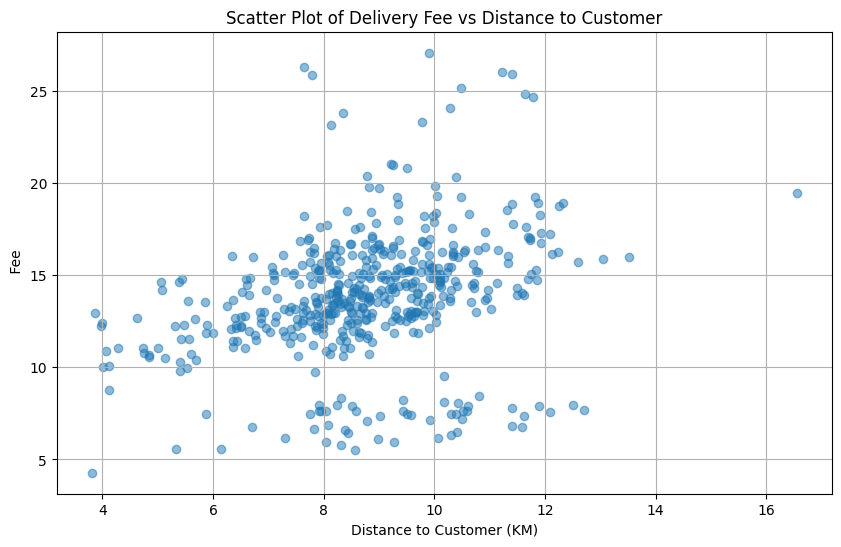

In [116]:
import matplotlib.pyplot as plt
# the Delivery fee scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(outliers['distance_to_customer_KM'], outliers['delivery_fee'], alpha=0.5)
plt.title('Scatter Plot of Delivery Fee vs Distance to Customer')
plt.xlabel('Distance to Customer (KM)')
plt.ylabel(' Fee')
plt.grid(True)
plt.show()

<a name="sec_21"></a>
## feature engineering

In [117]:
# create 'original_delivery_fee', no discount
outliers['original_delivery_fee'] = outliers.apply(
    lambda row: row['delivery_fee'] * 2 if row['customerHasloyalty?'] == 1 and pd.notna(row['delivery_fee']) else row['delivery_fee'], axis=1
)

# create 'weekend'
outliers['date_changed'] = pd.to_datetime(outliers['date'])
outliers['weekend'] = outliers['date_changed'].dt.dayofweek >= 5

# create 'time_of_day'
def time_of_day(order_type):
    if order_type == 'Breakfast':
        return 0  # Morning
    elif order_type == 'Lunch':
        return 1  # Afternoon
    else:
        return 2  # Evening

outliers['time_of_day'] = outliers['order_type'].apply(lambda x: time_of_day(x))

# convert 'weekend'和'time_of_day' to int
outliers['weekend'] = outliers['weekend'].astype(int)
outliers['time_of_day'] = outliers['time_of_day'].astype(int)

outliers.info()
# complete feature engineering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 500 non-null    object        
 1   date                     500 non-null    object        
 2   time                     500 non-null    object        
 3   order_type               500 non-null    object        
 4   branch_code              500 non-null    object        
 5   order_items              500 non-null    object        
 6   order_price              500 non-null    float64       
 7   customer_lat             500 non-null    float64       
 8   customer_lon             500 non-null    float64       
 9   customerHasloyalty?      500 non-null    int64         
 10  distance_to_customer_KM  500 non-null    float64       
 11  delivery_fee             500 non-null    float64       
 12  original_delivery_fee    500 non-nul

complete feature engineering

scatter plot of original_delivery_fee

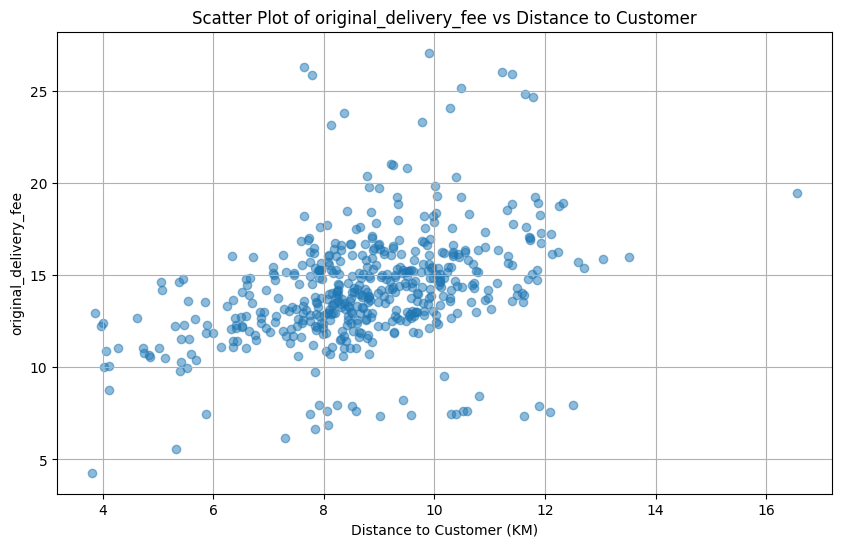

In [118]:
# scatter plot of original_delivery_fee vs distance_to_customer_KM
plt.figure(figsize=(10, 6))
plt.scatter(outliers['distance_to_customer_KM'], outliers['original_delivery_fee'], alpha=0.5)
plt.title('Scatter Plot of original_delivery_fee vs Distance to Customer')
plt.xlabel('Distance to Customer (KM)')
plt.ylabel('original_delivery_fee')
plt.grid(True)
plt.show()

<a name="sec_22"></a>
## Predict delivery_fee

In [119]:
# copy dataframe
valid_data = outliers.copy()

# Use the trained model to make predictions and add the predictions to the outliers DataFrame
predict_fee = []

for _, row in outliers.iterrows():
    branch = row['branch_code']
    time_period = row['time_of_day']
    if (branch, time_period) in models:
        model = models[(branch, time_period)]
        X = pd.DataFrame([[row['weekend'], row['distance_to_customer_KM']]], columns=['weekend', 'distance_to_customer_KM'])
        pred = model.predict(X)[0]
    else:
        pred = np.nan  # If there is no corresponding model, fill with NaN
    predict_fee.append(pred)

outliers['predict_fee'] = predict_fee
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 500 non-null    object        
 1   date                     500 non-null    object        
 2   time                     500 non-null    object        
 3   order_type               500 non-null    object        
 4   branch_code              500 non-null    object        
 5   order_items              500 non-null    object        
 6   order_price              500 non-null    float64       
 7   customer_lat             500 non-null    float64       
 8   customer_lon             500 non-null    float64       
 9   customerHasloyalty?      500 non-null    int64         
 10  distance_to_customer_KM  500 non-null    float64       
 11  delivery_fee             500 non-null    float64       
 12  original_delivery_fee    500 non-nul

<a name="sec_23"></a>
## Calculate residuals and define outlier using IQR
Plot the box plot for residuals

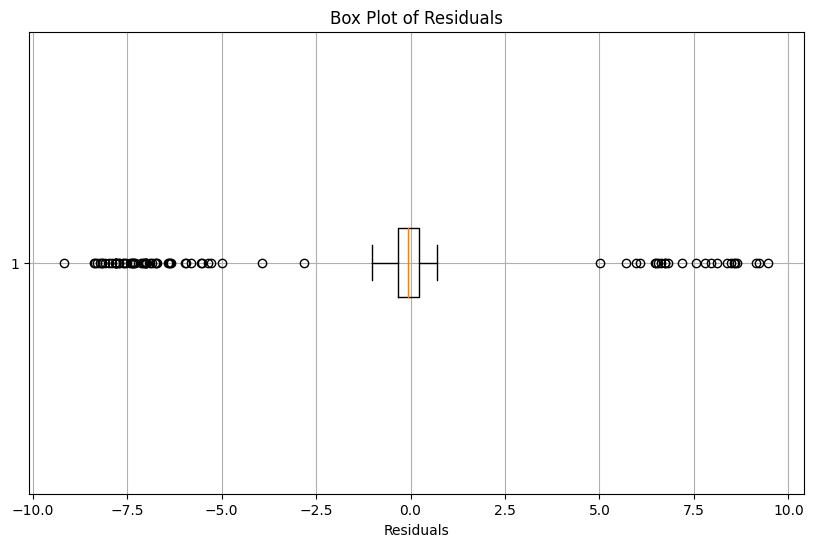

In [120]:
# Calculate the residuals
outliers['residuals'] = outliers['delivery_fee'] - outliers['predict_fee']

# Removing outliers from residuals using the IQR method
Q1 = outliers['residuals'].quantile(0.25)
Q3 = outliers['residuals'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plotting the box plots of the residuals
plt.figure(figsize=(10, 6))
plt.boxplot(outliers['residuals'], vert=False)
plt.title('Box Plot of Residuals')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()

<a name="sec_24"></a>
## Filter outliers and plot

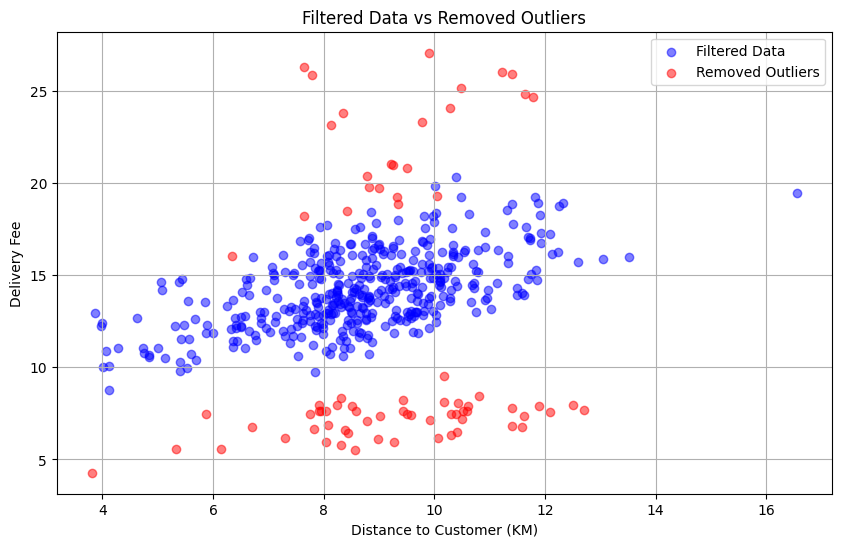

In [139]:
filtered_result_df = outliers[(outliers['residuals'] >= lower_bound) & (outliers['residuals'] <= upper_bound)]
removed_outliers_df = outliers[(outliers['residuals'] < lower_bound) | (outliers['residuals'] > upper_bound)]


# Plot a scatterplot of filtered and removed data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_result_df['distance_to_customer_KM'], filtered_result_df['delivery_fee'], alpha=0.5, label='Filtered Data', color='blue')
plt.scatter(removed_outliers_df['distance_to_customer_KM'], removed_outliers_df['delivery_fee'], alpha=0.5, label='Removed Outliers', color='red')
plt.xlabel('Distance to Customer (KM)')
plt.ylabel('Delivery Fee')
plt.title('Filtered Data vs Removed Outliers')
plt.legend()
plt.grid(True)
plt.show()

<a name="sec_25"></a>
## Verify and output

In [140]:
filtered_result_df.drop(['original_delivery_fee','date_changed','weekend','time_of_day','predict_fee','residuals'],axis = 1,inplace = True)

filtered_result_df.info()

outliers_original = pd.read_csv('/content/Group011_outlier_data.csv')
outliers_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 0 to 497
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 424 non-null    object 
 1   date                     424 non-null    object 
 2   time                     424 non-null    object 
 3   order_type               424 non-null    object 
 4   branch_code              424 non-null    object 
 5   order_items              424 non-null    object 
 6   order_price              424 non-null    float64
 7   customer_lat             424 non-null    float64
 8   customer_lon             424 non-null    float64
 9   customerHasloyalty?      424 non-null    int64  
 10  distance_to_customer_KM  424 non-null    float64
 11  delivery_fee             424 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 43.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data colu

output to csv

In [141]:
filtered_result_df.to_csv('group011_outlier_data_solution.csv', index=False)

# Task 2: DataReshaping
<a name="s0"></a>
The data were first processed as necessary and then reshaped to study the effect of different normalization/transformation (i.e standardisation, min-max normalization, log, power, box-cox transformation) methods. Also make sure that the features are on the same scale and have as many linear relationships as possible.

## Load and process data
<a name="s1"></a>
First load data and do the necessary data processing, such as removing $ signs and keeping the columns that need to be explored.

### Load and process
<a name="s2"></a>

In [142]:
# load data
file_path = '/content/suburb_info.xlsx'
df = pd.read_excel(file_path)

# Percentages are processed into numeric values
# Remove percent signs % and convert to float
df['aus_born_perc'] = df['aus_born_perc'].str.rstrip('%').astype('float') / 100.0

# Remove commas and dollar signs and convert to float
df['median_income'] = df['median_income'].str.replace(',', '').str.replace('$', '').astype('int')
df['median_house_price'] = df['median_house_price'].str.replace(',', '').str.replace('$', '').astype('int')
# drop columns
df.drop(['suburb','municipality'], axis = 1, inplace = True)


# View basic data information
print(df.info())
print(df.describe())
print(df.dtypes)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_houses    202 non-null    int64  
 1   number_of_units     202 non-null    int64  
 2   aus_born_perc       202 non-null    float64
 3   median_income       202 non-null    int64  
 4   median_house_price  202 non-null    int64  
 5   population          202 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.6 KB
None
       number_of_houses  number_of_units  aus_born_perc  median_income  \
count        202.000000       202.000000     202.000000     202.000000   
mean        4155.767327      2480.410891       0.683663    1387.935644   
std         3400.864988      3132.684712       0.107613     317.841321   
min          283.000000        60.000000       0.360000     633.000000   
25%         1973.500000       620.500000       0.620000    1182.250000   
50%  

,number_of_houses,number_of_units,aus_born_perc,median_income,median_house_price,population
0,2304,4706,0.68,1797,1299400,4025
1,1410,453,0.81,1571,1926600,22442
2,1897,138,0.46,907,594200,54005
3,1389,1392,0.52,929,739100,30677
4,1729,1099,0.73,1538,1729600,9227
5,4843,2394,0.70,1160,1139500,11742
6,5002,1622,0.52,910,935500,12830
7,1263,335,0.46,895,663400,10176
8,2838,3841,0.73,1713,1925900,8428
9,2378,1176,0.73,1469,1436500,12420


### Original Plot
<a name="s3"></a>
Plot histograms to see the distribution of the data and scatter plots of features versus targets to see linear relationships. Calculate correlation coefficients to judge linear relationships and plot heat maps to visualize them.

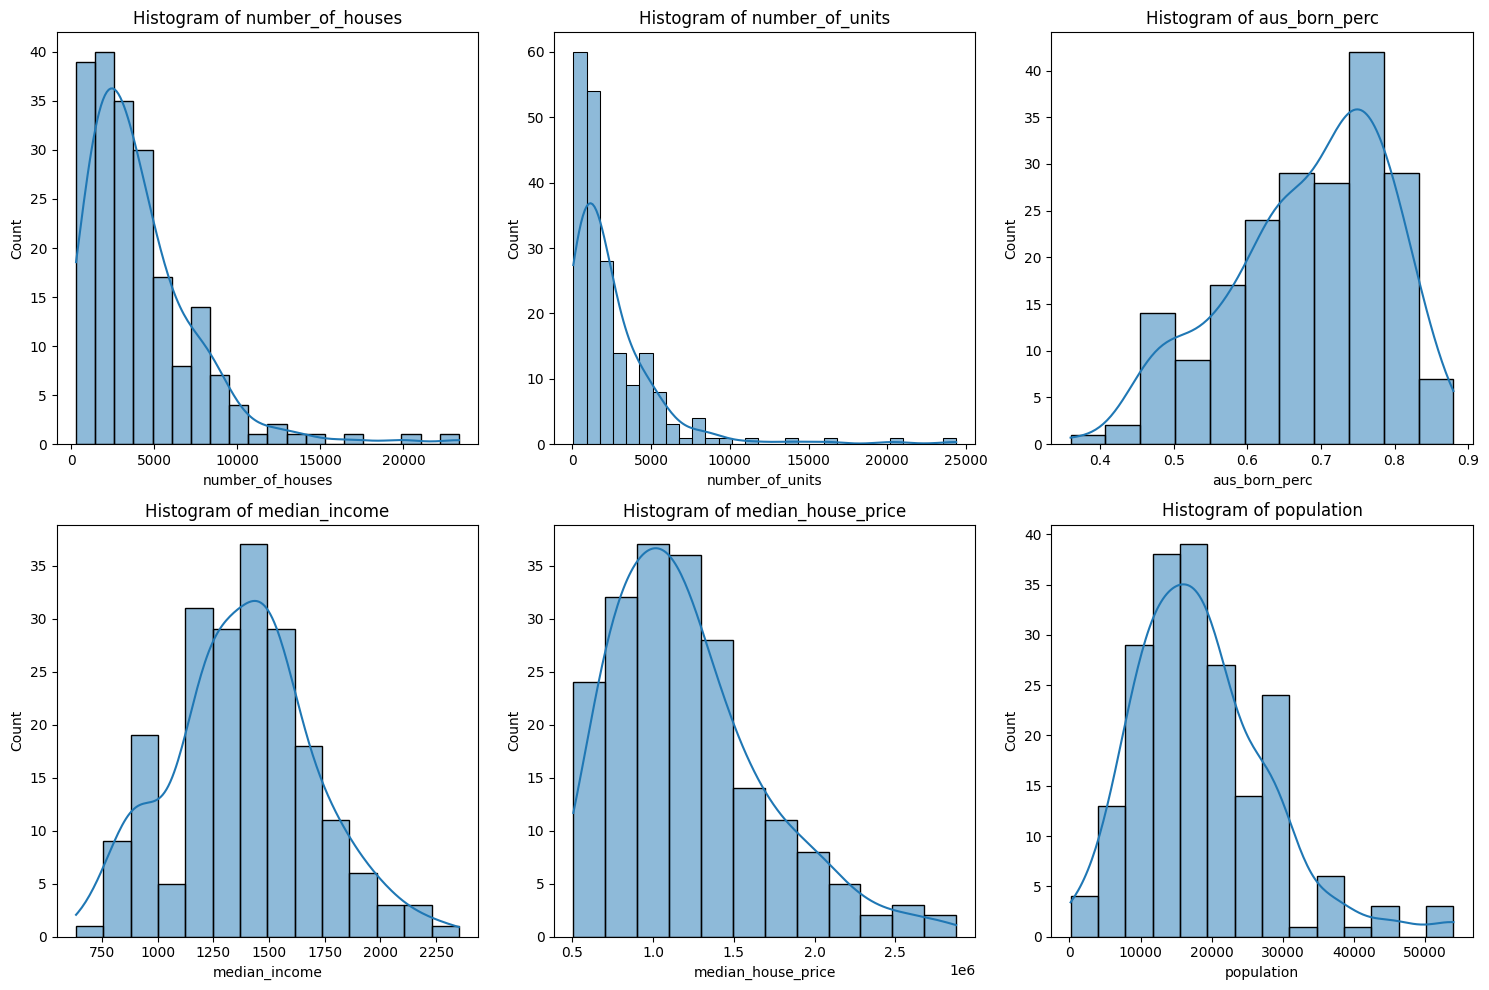

In [143]:
features = ['number_of_houses','number_of_units','aus_born_perc','median_income','population']
target = 'median_house_price'
# Plotting histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

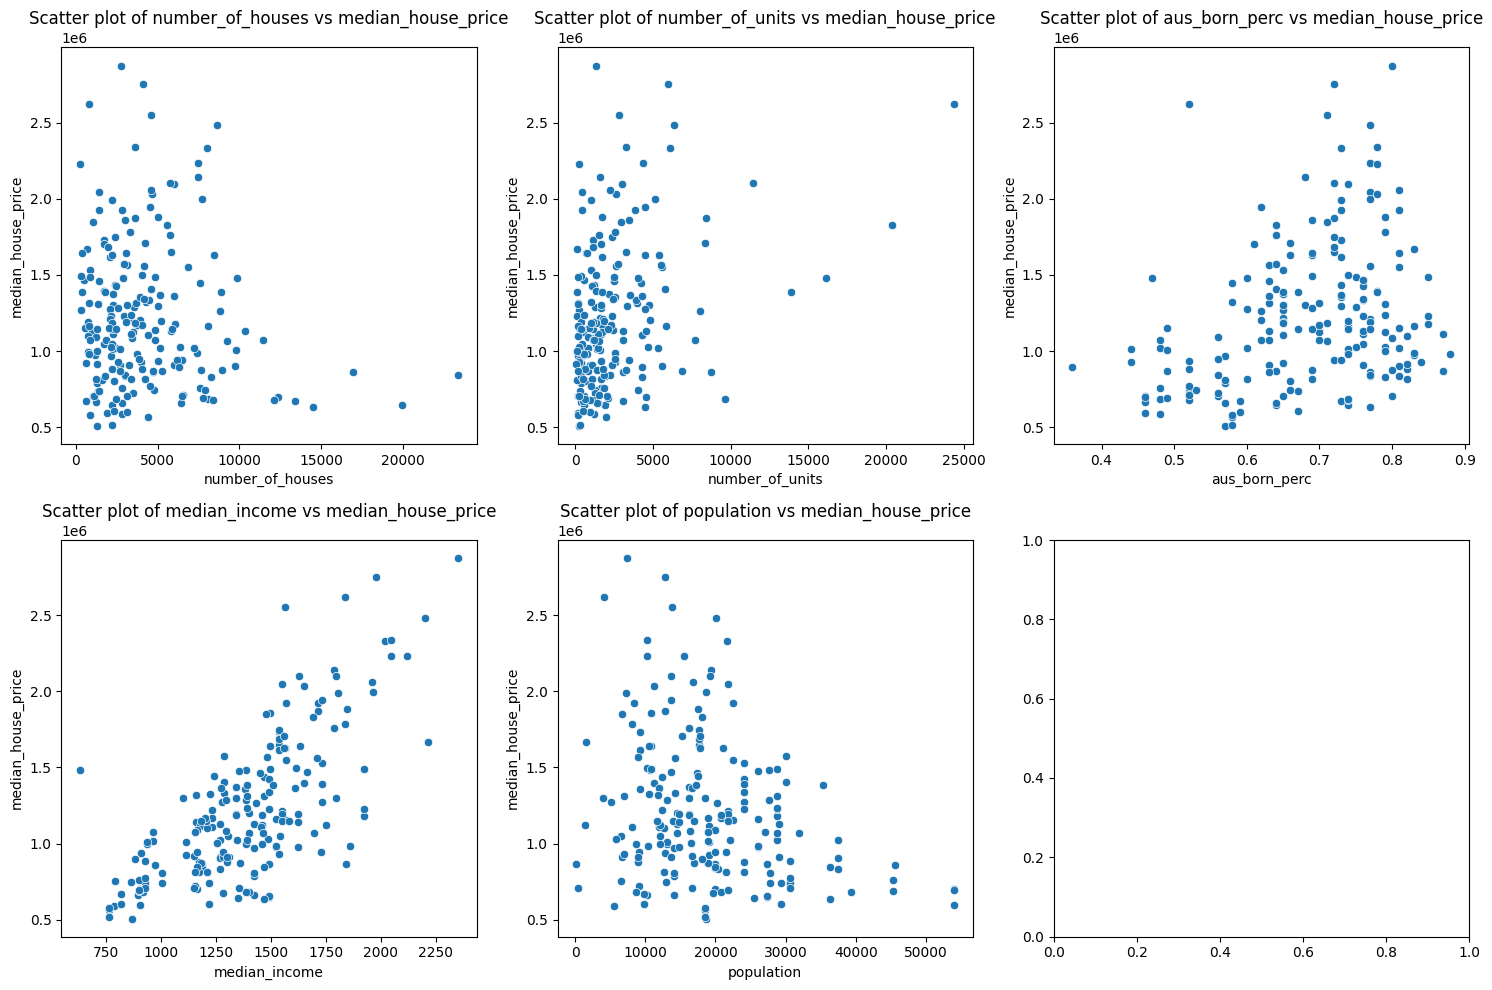

In [127]:
# Plotting scatterplots of features vs. target variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(features):
    sns.scatterplot(x=df[col], y=df[target], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Scatter plot of {col} vs {target}')
plt.tight_layout()
plt.show()

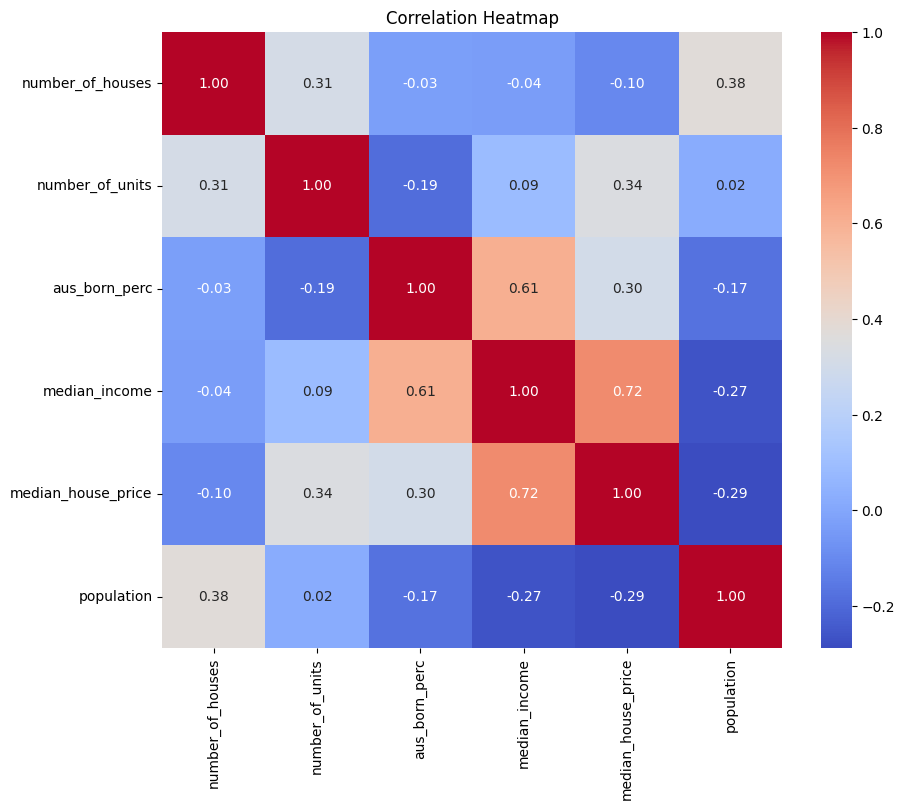

In [128]:
# Calculate and visualize correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Next, we will transform both the feature and target to get the new feature. Then plot the scatter plot new_feature vs new_target

## Transformation
<a name="s4"></a>
transform data, plot feature vs. target, calculation relationship.

In [129]:
# define feature and target
feature = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'population']
target = 'median_house_price'

### Log Transformation
Using log10 transform columns and then plot.
<a name="s5"></a>

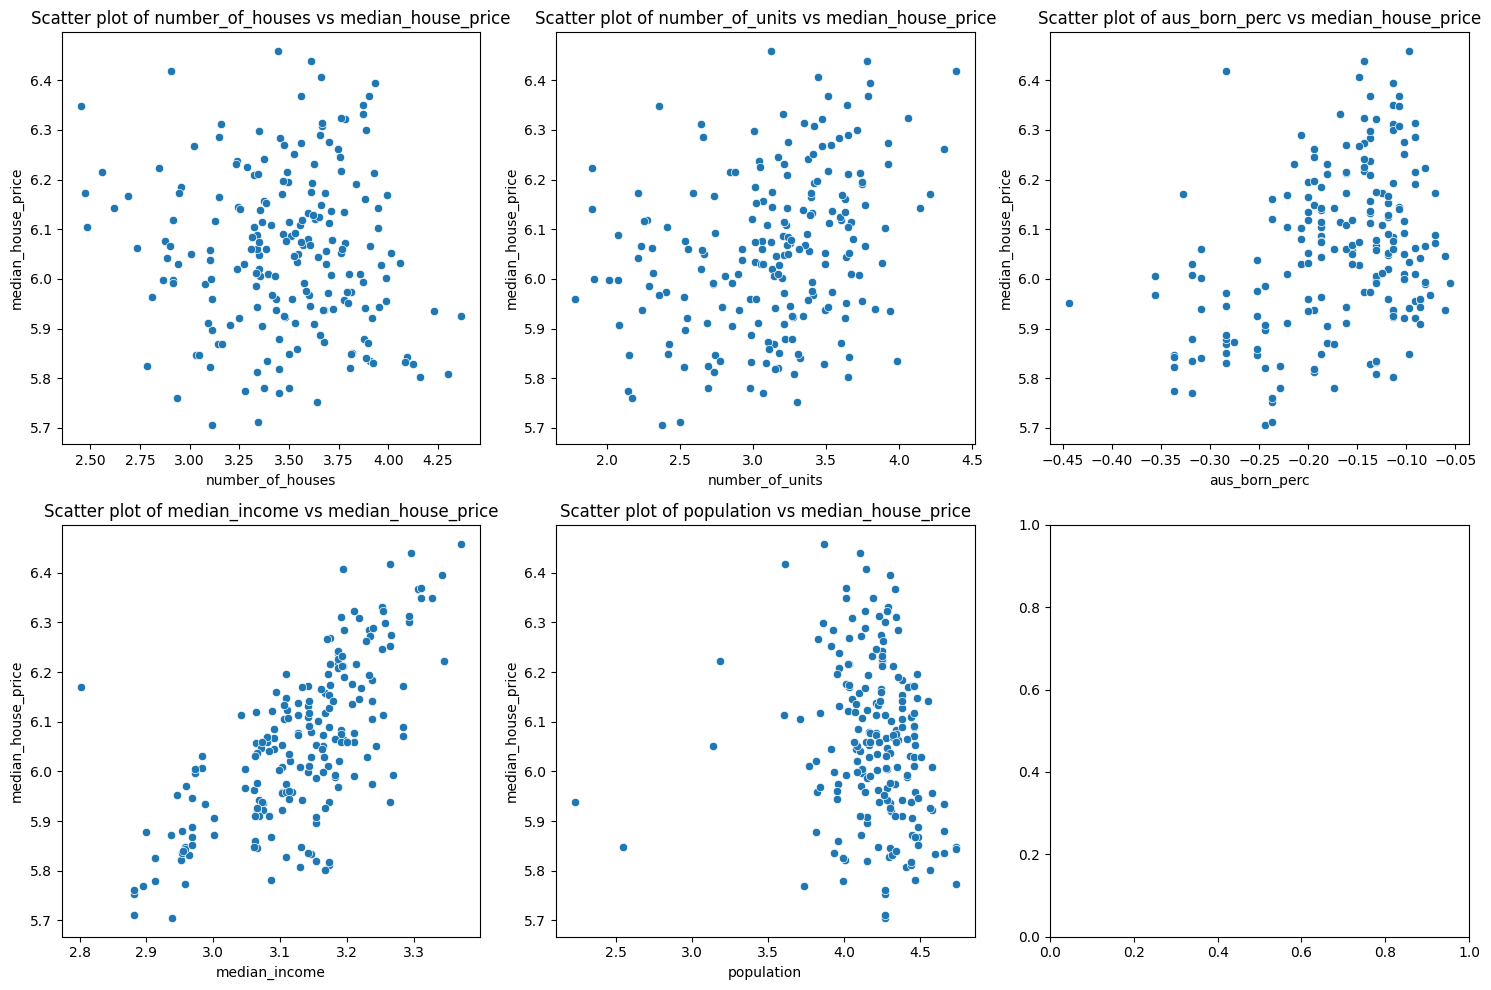

In [130]:
log_df = df.apply(lambda x: np.log10(x))
# Plotting scatterplots of features vs. target variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(features):
    sns.scatterplot(x=log_df[col], y=log_df[target], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Scatter plot of {col} vs {target}')
plt.tight_layout()
plt.show()

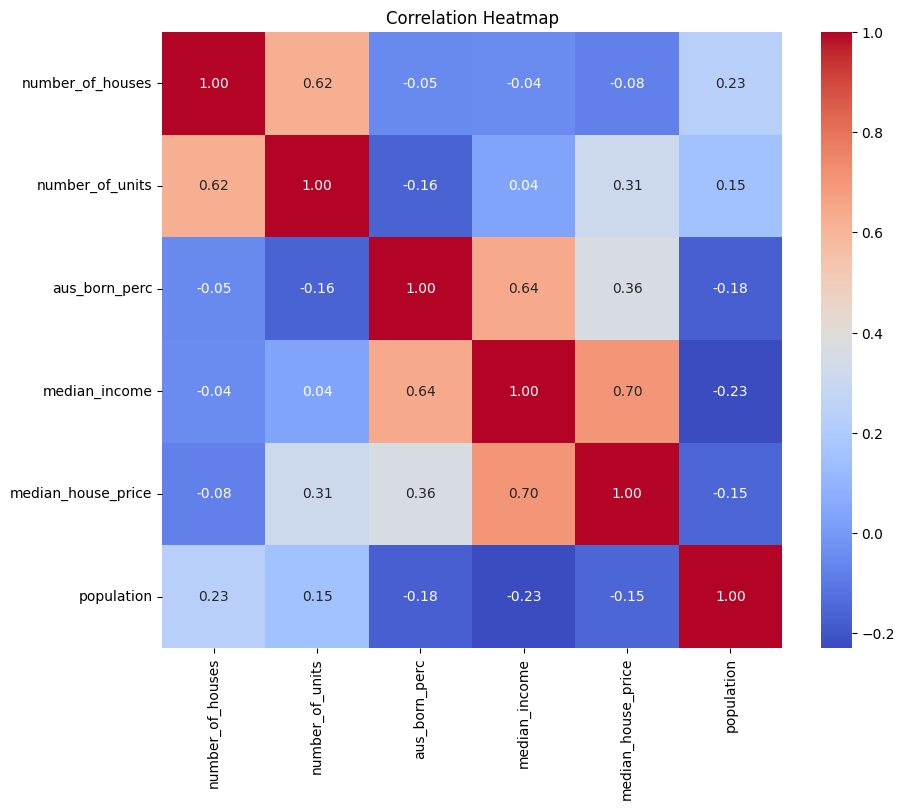

In [131]:
# Calculate and visualize correlations
correlation_matrix = log_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Power Transformation
Apply different power transformations to the columns, after which graph and calculate the correlation coefficients.
powers = [-2, -1, 2, 3, 0.5]
<a name="s6"></a>

In [132]:
df_1 = df.astype(float)+0.01  # Convert to float, make sure there are no zeros in the logarithmic transformation
powers = [-2, -1, 2, 3, 0.5]
# Apply a power transformation to each column
power_df_dict = {}
for power in powers:
    transformed_df = np.power(df_1, power)
    transformed_target = transformed_df[target]
    transformed_df = transformed_df.drop(columns=[target])
    power_df_dict[f'power_{power}'] = (transformed_df, transformed_target)

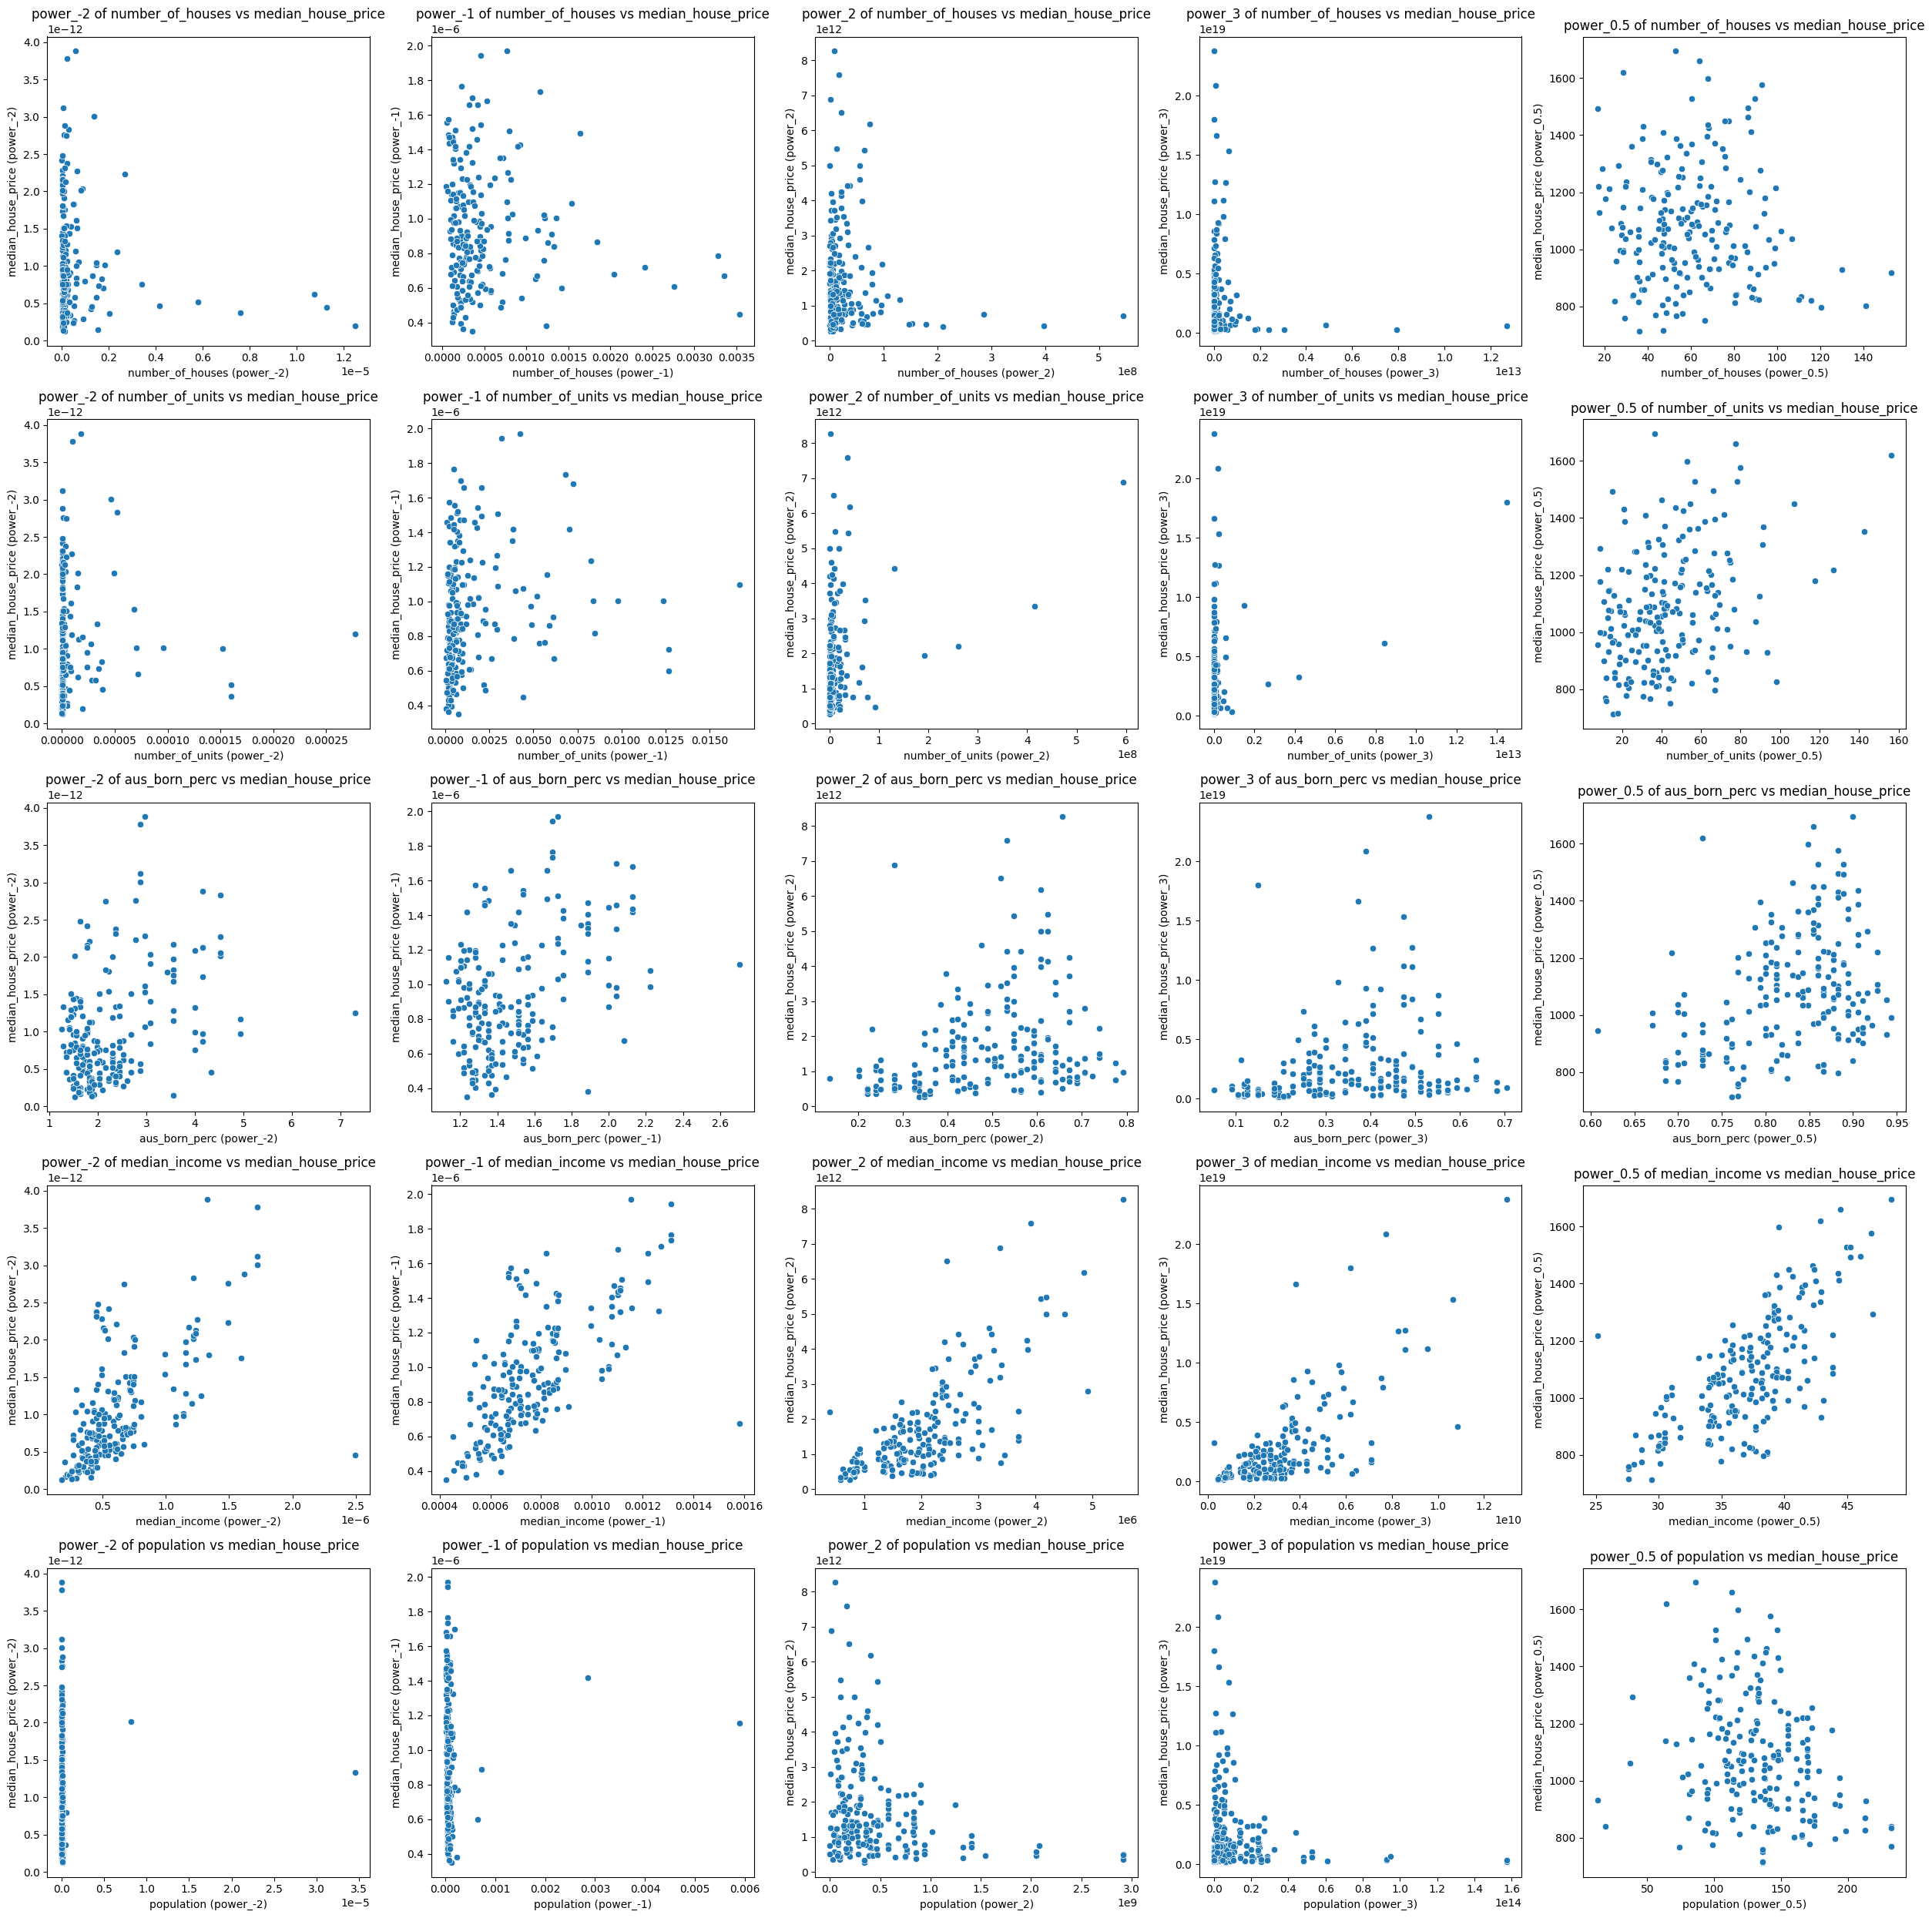

In [133]:
# Initialize the subgraph grid
num_features = len(df_1.columns) - 1  # Exclude columns for target variables
fig, axes = plt.subplots(num_features, len(powers), figsize=(5 * len(powers), 5 * num_features))

# axes is not a 2D array if there is only one feature
if num_features == 1:
    axes = np.array([axes]).T  # Ensure 2D array index consistency

# Iterate over each feature
for i, col in enumerate(df_1.columns):
    if col != target:
        feature_index = i if i < df_1.columns.get_loc(target) else i - 1  # Adjust indexes to avoid target columns
        for j, (power_key, (transformed_df, transformed_target)) in enumerate(power_df_dict.items()):
            ax = axes[feature_index, j]
            sns.scatterplot(x=transformed_df[col], y=transformed_target, ax=ax)
            ax.set_title(f'{power_key} of {col} vs {target}')
            ax.set_xlabel(f'{col} ({power_key})')
            ax.set_ylabel(f'{target} ({power_key})')

plt.tight_layout()
plt.show()

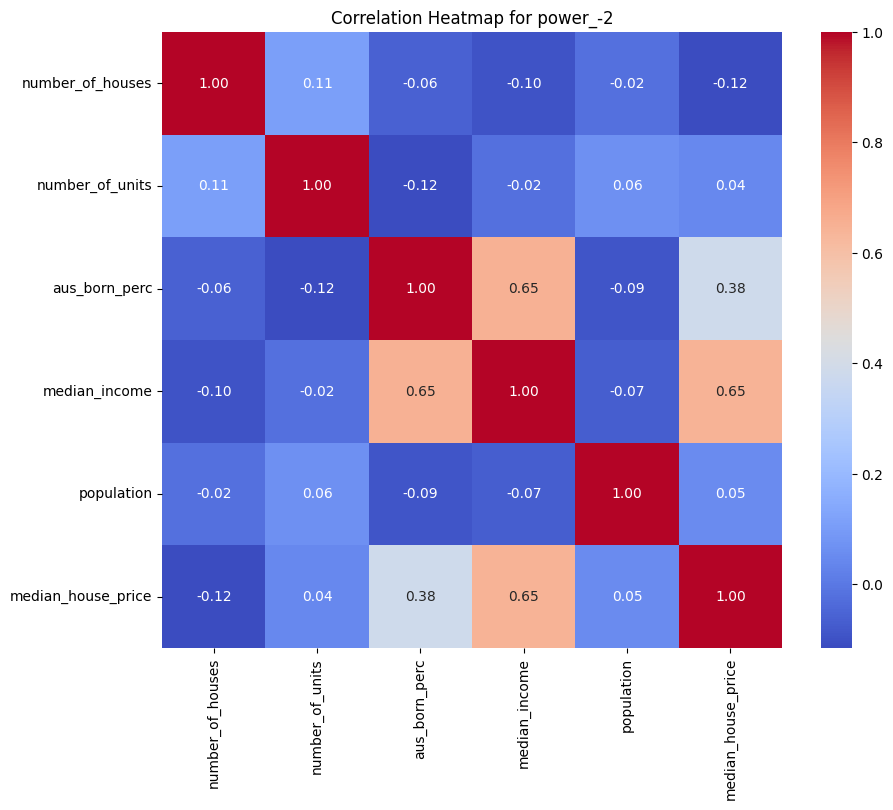

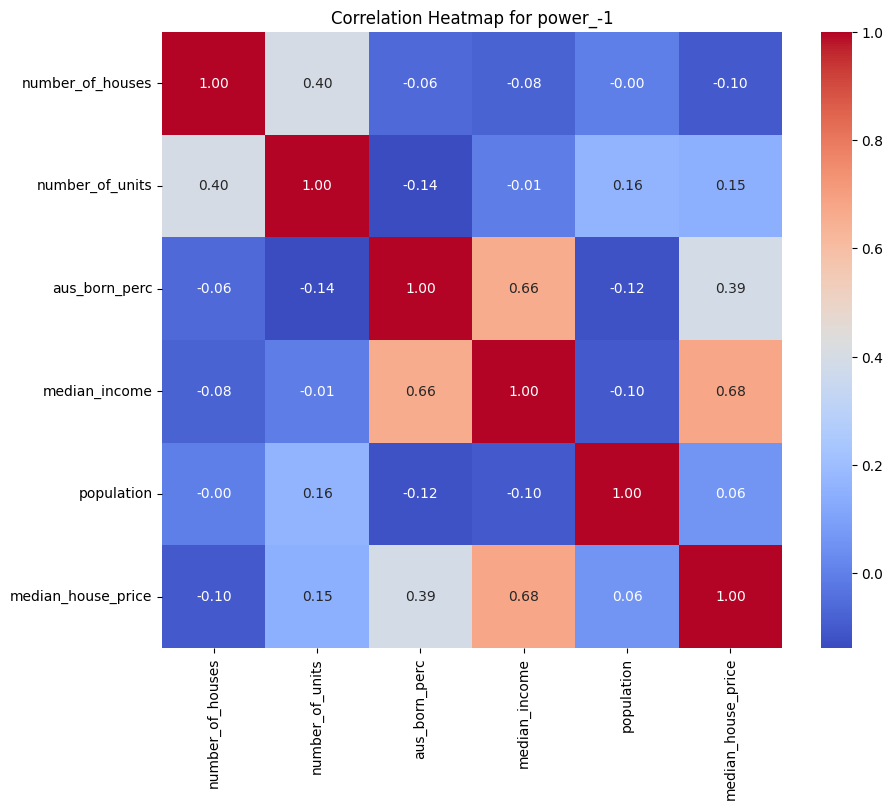

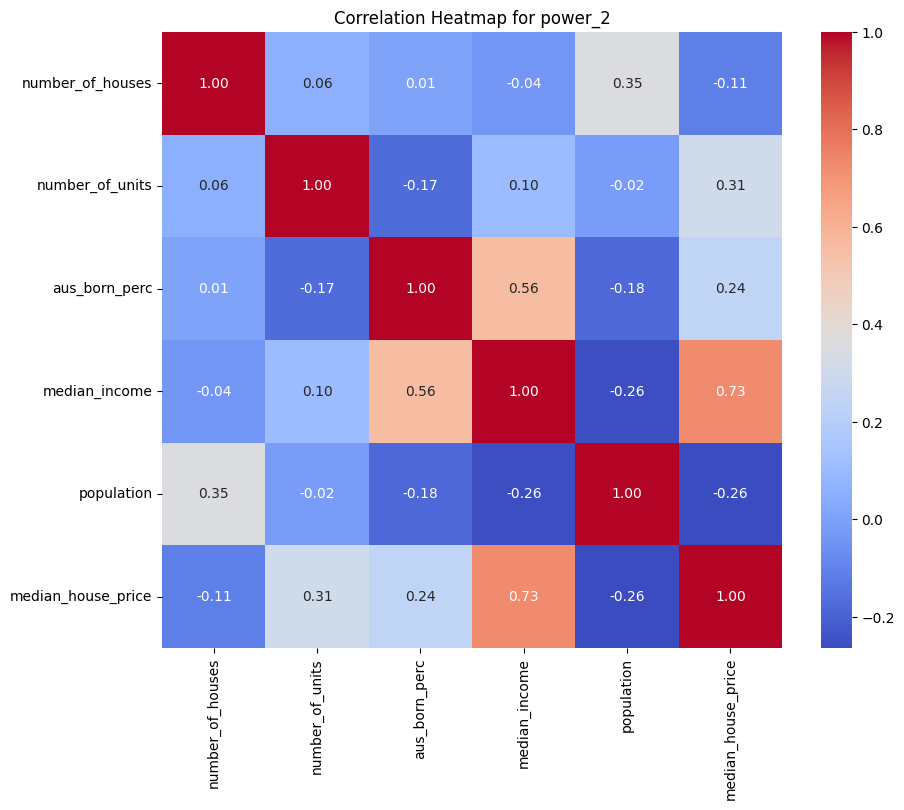

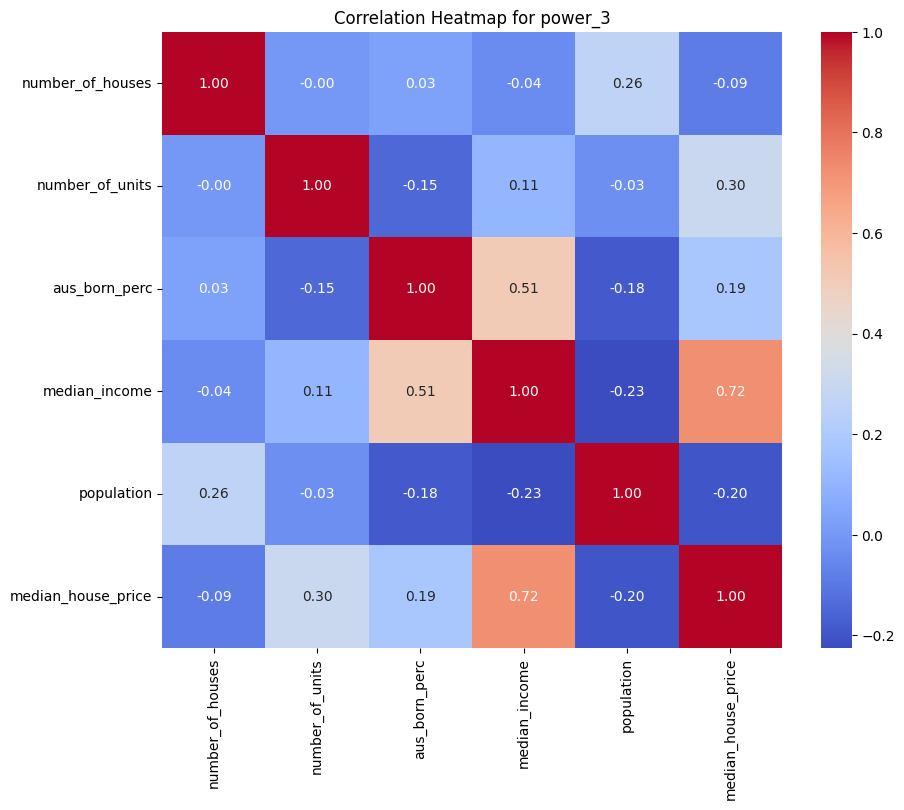

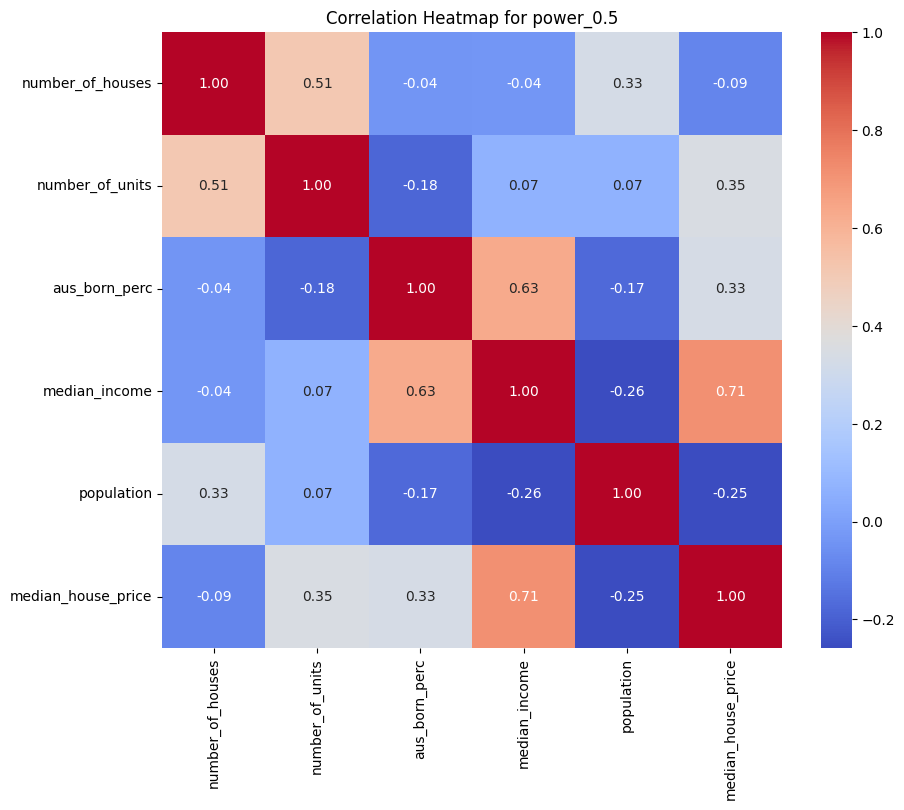

In [134]:
#  Calculate the correlation coefficient for each transformation separately and plot the heat map
for power_key, (transformed_df, transformed_target) in power_df_dict.items():
    plot_df = transformed_df.copy()
    plot_df[target] = transformed_target

    # Calculate relevance
    correlation_matrix = plot_df.corr()

    # Heat mapping
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for {power_key}")
    plt.show()

### Box-Cox Transformation
<a name="s7"></a>

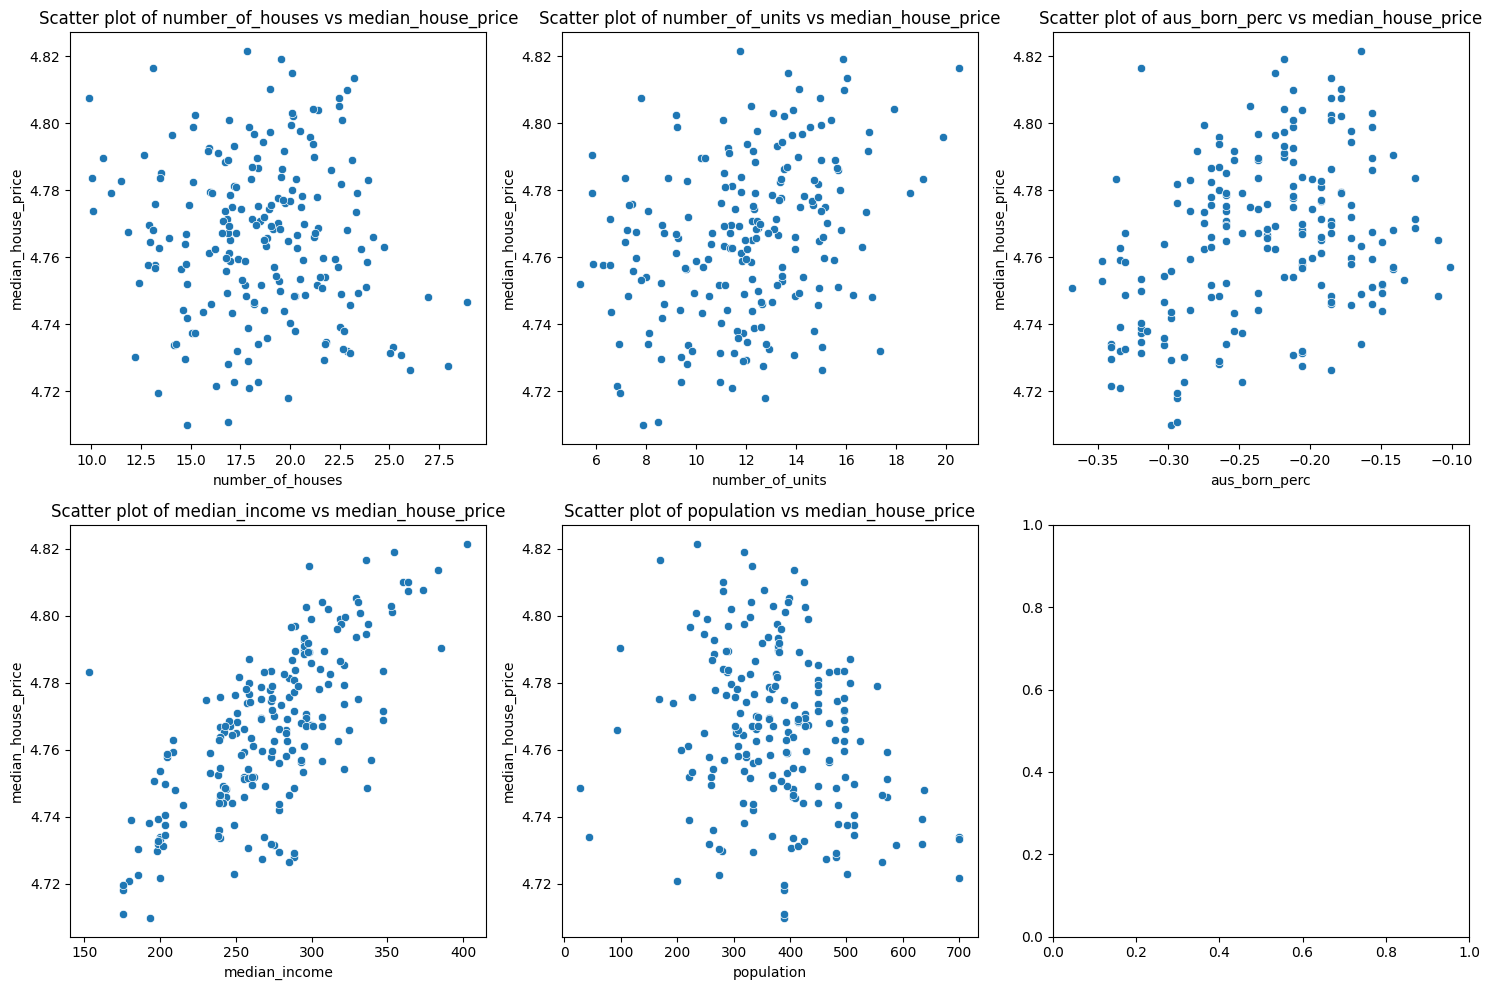

In [135]:
# Apply Box-Cox transformations to each column
boxcox_df_dict = {}
for col in df_1.columns:
    transformed_col, _ = boxcox(df_1[col])
    boxcox_df_dict[col] = transformed_col
# Create a new DataFrame to store the Box-Cox transformed data
boxcox_df = pd.DataFrame(boxcox_df_dict)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(features):
    sns.scatterplot(x=boxcox_df[col], y=boxcox_df[target], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Scatter plot of {col} vs {target}')
plt.tight_layout()
plt.show()

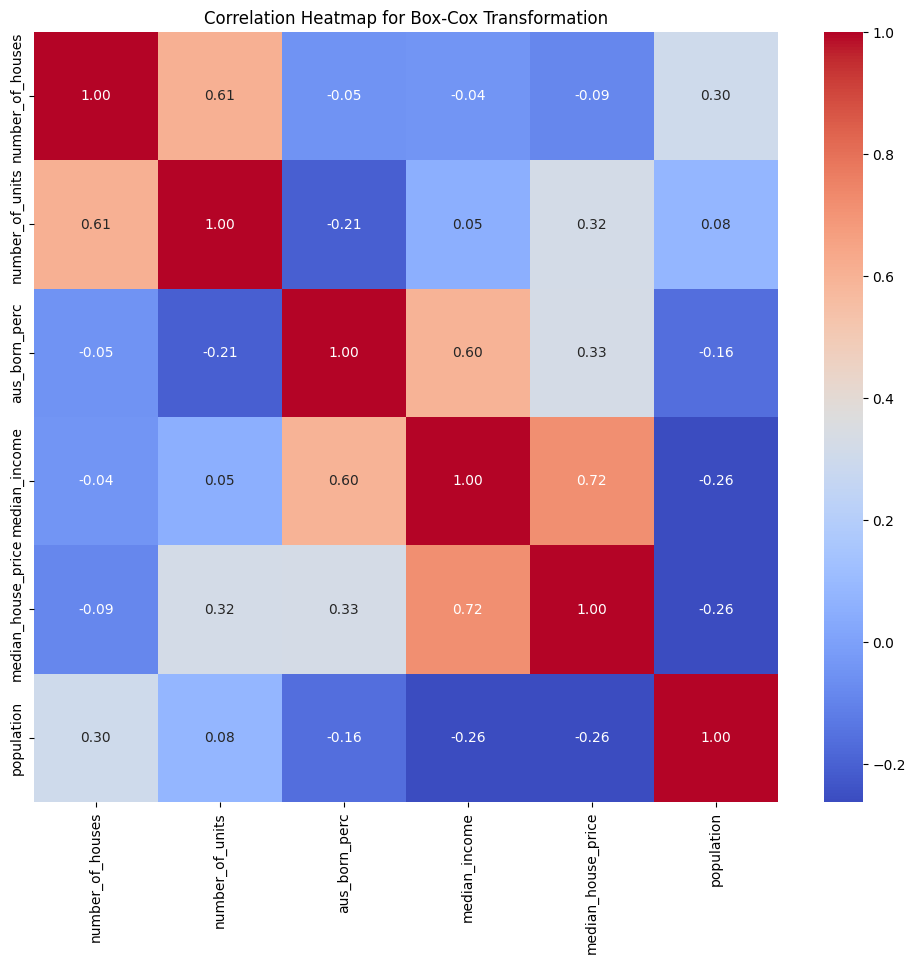

In [136]:
correlation_matrix = boxcox_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Box-Cox Transformation")
plt.show()

<a name="s8"></a>
## Comparison of Correlation

In [137]:
original_corr = df.corr()[target]
correlation_matrix = log_df.corr()[target]
boxcox_corr = boxcox_df.corr()[target]
log_corr = log_df.corr()[target]
# Apply a power transformation to each column
power_corr_dict = {}
for power in powers:
    transformed_df = np.power(df_1, power)
    transformed_target = transformed_df[target]
    transformed_df = transformed_df.drop(columns=[target])
    transformed_df[target] = transformed_target
    power_corr_dict[f'power_{power}'] = transformed_df.corr()[target]
# Print raw data and transformed correlation coefficients for comparison
print("Original Data Correlation:")
print(original_corr)
print("\nPower Transformations Correlations:")
for key, corr in power_corr_dict.items():
    print(f"\n{key} Correlation:")
    print(corr)
print("\nBox-Cox Transformation Correlation:")
print(boxcox_corr)
print("\nlog Transformation Correlation:")
print(log_corr)

Original Data Correlation:
number_of_houses     -0.104490
number_of_units       0.343858
aus_born_perc         0.303860
median_income         0.719384
median_house_price    1.000000
population           -0.287242
Name: median_house_price, dtype: float64

Power Transformations Correlations:

power_-2 Correlation:
number_of_houses     -0.115526
number_of_units       0.044760
aus_born_perc         0.383942
median_income         0.646539
population            0.052963
median_house_price    1.000000
Name: median_house_price, dtype: float64

power_-1 Correlation:
number_of_houses     -0.098797
number_of_units       0.150490
aus_born_perc         0.389087
median_income         0.678301
population            0.059453
median_house_price    1.000000
Name: median_house_price, dtype: float64

power_2 Correlation:
number_of_houses     -0.111257
number_of_units       0.305727
aus_born_perc         0.241360
median_income         0.725098
population           -0.263369
median_house_price    1.000000
N

Although the linear correlation between feature and target improves little with various transformation methods, the recommended transformation method of choice is Power Transformation (power_2)

Rationale:

- Maximize the linear relationship:

We compared the correlation coefficients between each feature and the target variable after the original data and various transformation methods, including different power transformations and Box-Cox transformations. For the feature median_income, the power_2 transformed correlation coefficient is the highest among all the transformation methods, reaching 0.725098, which is slightly higher than the correlation coefficient of 0.719384 for the original data.

- Comprehensive transformation effect:

In addition to median_income, the power_2 transform also performs well on other features. For example, the correlation coefficient of number_of_units is 0.305727, which is second only to the correlation coefficient of power_0.5, which is 0.349885. This shows that the power_2 transform can provide a good linear relationship on several features.

- Interpretability:

Although the correlation coefficients do not change much relatively after the power_2 transform, the power_2 transform is able to improve the interpretability of the data and the stability of the model, which is important for building robust linear regression models.

## Normalisation
<a name="s9"></a>
Since we are going to use linear regression method for modeling, we recommend the maxmin method for normalisation. this method prevents attributes with too much difference from taking precedence over other attributes, and can make the data at the same scale. in addition, since this transformation is linear and does not affect the linear relationship between the data, linear relationships will not be calculated in the following.


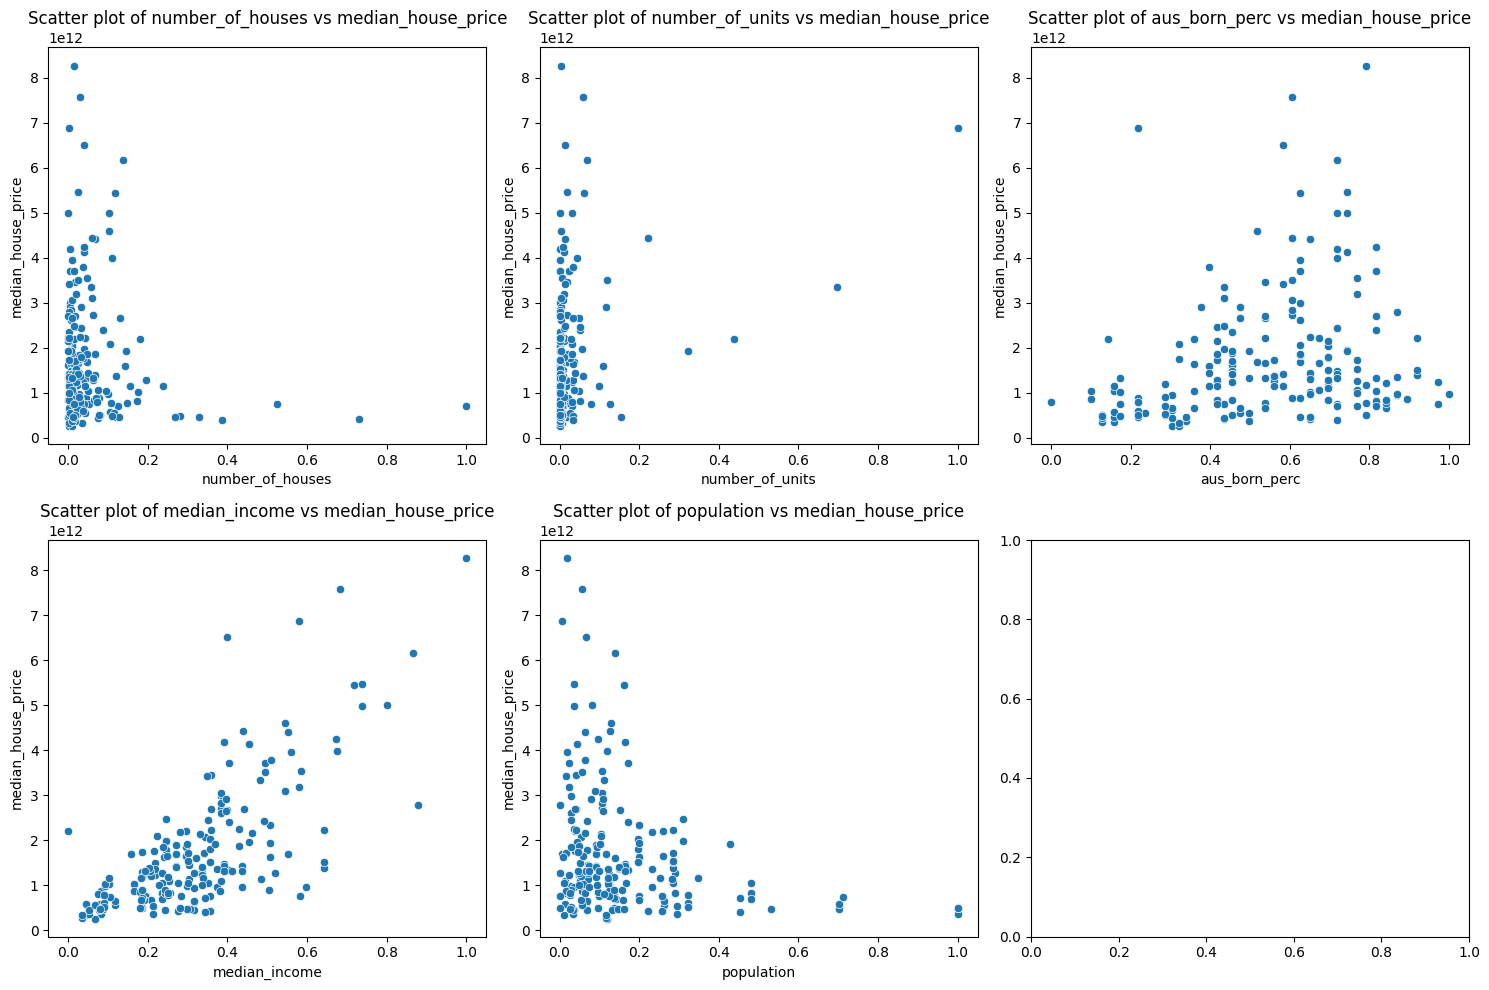

In [138]:
# Apply power_2 transformation to each column
transformed_df = np.power(df_1, 2)
transformed_target = transformed_df[target]
transformed_df = transformed_df.drop(columns=[target])
transformed_df[target] = transformed_target

# Min-Max normalization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(transformed_df.drop(columns=[target]))
scaled_df = pd.DataFrame(scaled_features, columns=transformed_df.columns[:-1])
scaled_df[target] = transformed_df[target].values
# scatter plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(features):
    sns.scatterplot(x=scaled_df[col], y=scaled_df[target], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Scatter plot of {col} vs {target}')
plt.tight_layout()
plt.show()
